# Perbandingan Model Variasi _Recurrent Neural Networks_ Pada Kasus Prediksi Debit Aliran

Buku (_Notebook_) ini akan membandingkan hasil prediksi debit aliran dari model konseptual (NRECA dan FJMOCK) dan beberapa model _Deep Learning_ yaitu _Artificial Neural Network_ (_Multi Layer Perceptron_ (MLP)) dan variasi _Recurrent Neural Networks_ (Vanila RNN, _Long Short-Term Memory_ (LSTM), _Gated Recurrent Unit_ (GRU)). Buku ini lebih mengutamakan implementasi penggunaan, dan mempresentasikan hasil dari masing-masing model (visualisasi).

Buku ini juga memeragakan penggunaan hidrokit versi 0.3.5. Informasi mengenai hidrokit dapat dibaca di [hidrokit.github.io/hidrokit](https://hidrokit.github.io/hidrokit).

## PENGATURAN BUKU

Buku ini dikembangkan menggunakan Google Colab. _Runtime_ Google Colab digunakan saat pelatihan model, sedangkan _runtime_ lokal untuk evaluasi dan pengembangan kode.

In [ ]:
#@title PENGGUNAAN RUNTIME (GOOGLE COLAB/LOKAL) {display-mode:"form", run:"auto"}
# Using Google Colab or Local System
_IS_LOCAL = True #@param {type:"boolean"}

(print('RUNTIME: LOKAL') if _IS_LOCAL else print('RUNTIME: GOOGLE COLAB'))

RUNTIME: LOKAL


In [ ]:
#@title PENGGUNAAN MODEL TERKALIBRASI {display-mode:"form", run:"auto"}
#@markdown Model NRECA & FJ. MOCK
_USE_CALIBRATED_MODEL = True #@param {type:"boolean"}

_CALD_NRECA_BULANAN = 'nreca_res_bulanan.csv' #@param {type:"string"}
_CALD_NRECA_2p = 'nreca_res_2p.csv' #@param {type:"string"}

_CALD_FJMOCK_BULANAN = 'fjmock_res_bulanan.csv' #@param {type:"string"}
_CALD_FJMOCK_2p = 'fjmock_res_2p.csv' #@param {type:"string"}

print(f'USE CALIBRATED MODEL: {_USE_CALIBRATED_MODEL}')

USE CALIBRATED MODEL: True


In [ ]:
#@title PENGGUNAAN MODEL TERLATIH {display-mode:"form", run:"auto"}
#@markdown Model ANN, RNN, LSTM, dan GRU
_USE_TRAINED_MODEL = True #@param {type:"boolean"}

#@markdown ## ANN
# ANN
_TRAINED_ANN_MODEL_TS5 = 'ann_model_ts5.h5' #@param {type:"string"}
_ANN_HISTORY_TS5 = 'ann_history_ts5.csv' #@param {type:"string"}
_TRAINED_ANN_MODEL_TS10 = 'ann_model_ts10.h5' #@param {type:"string"}
_ANN_HISTORY_TS10 = 'ann_history_ts10.csv' #@param {type:"string"}
_TRAINED_ANN_MODEL_TS365 = 'ann_model_ts365.h5' #@param {type:"string"}
_ANN_HISTORY_TS365 = 'ann_history_ts365.csv' #@param {type:"string"}

#@markdown ## RNN
# RNN
_TRAINED_RNN_MODEL_TS5 = 'rnn_model_ts5.h5' #@param {type:"string"}
_RNN_HISTORY_TS5 = 'rnn_history_ts5.csv' #@param {type:"string"}
_TRAINED_RNN_MODEL_TS10 = 'rnn_model_ts10.h5' #@param {type:"string"}
_RNN_HISTORY_TS10 = 'rnn_history_ts10.csv' #@param {type:"string"}
_TRAINED_RNN_MODEL_TS365 = 'rnn_model_ts365.h5' #@param {type:"string"}
_RNN_HISTORY_TS365 = 'rnn_history_ts365.csv' #@param {type:"string"}

#@markdown ## LSTM
# LSTM
_TRAINED_LSTM_MODEL_TS5 = 'lstm_model_ts5.h5' #@param {type:"string"}
_LSTM_HISTORY_TS5 = 'lstm_history_ts5.csv' #@param {type:"string"}
_TRAINED_LSTM_MODEL_TS10 = 'lstm_model_ts10.h5' #@param {type:"string"}
_LSTM_HISTORY_TS10 = 'lstm_history_ts10.csv' #@param {type:"string"}
_TRAINED_LSTM_MODEL_TS365 = 'lstm_model_ts365.h5' #@param {type:"string"}
_LSTM_HISTORY_TS365 = 'lstm_history_ts365.csv' #@param {type:"string"}

#@markdown ## GRU
# GRU
_TRAINED_GRU_MODEL_TS5 = 'gru_model_ts5.h5' #@param {type:"string"}
_GRU_HISTORY_TS5 = 'gru_history_ts5.csv' #@param {type:"string"}
_TRAINED_GRU_MODEL_TS10 = 'gru_model_ts10.h5' #@param {type:"string"}
_GRU_HISTORY_TS10 = 'gru_history_ts10.csv' #@param {type:"string"}
_TRAINED_GRU_MODEL_TS365 = 'gru_model_ts365.h5' #@param {type:"string"}
_GRU_HISTORY_TS365 = 'gru_history_ts365.csv' #@param {type:"string"}

#@markdown ## RECORD RUNNING
# GRU
_RECORDED_RUN = 'recorded_run.csv' #@param {type:"string"}

print(f'USE TRAINED MODEL: {_USE_TRAINED_MODEL}')

USE TRAINED MODEL: True


In [ ]:
#@title TAMPIL/SIMPAN GAMBAR {display-mode:"form", run:"auto"}
_SHOW_IMAGES = True #@param {type:"boolean"}
_SAVE_IMAGE = True #@param {type:"boolean"}


# INISIASI

In [ ]:
if _IS_LOCAL:
    pass
else:
    %tensorflow_version 2.x

In [ ]:
from pathlib import Path
if _IS_LOCAL:
    _LOCAL_DIRECTORY = './_dropbox/vivaldi' #@param {type:"string"}
    _DIRECTORY = Path(_LOCAL_DIRECTORY) 
    _DIRIMAGE = _DIRECTORY / 'img'
else:
    from google.colab import drive
    drive.mount('/content/gdrive')
    _CLOUD_DIRECTORY = '/content/gdrive/My Drive/Colab Notebooks/_dropbox/vivaldi' #@param {type:"string"}
    _DIRECTORY = Path(_CLOUD_DIRECTORY)
    _DIRIMAGE = _DIRECTORY / 'img'

In [ ]:
print(':: MEMERIKSA PAKET HIDROKIT')
try:
    import hidrokit
except ModuleNotFoundError:
    print(':: MEMASANG PAKET HIDROKIT')
    !pip install hidrokit -q

:: MEMERIKSA PAKET HIDROKIT


In [ ]:
print(':: MEMERIKSA PAKET HYDROERR')
try:
    import HydroErr
except ModuleNotFoundError:
    print(':: INSTALASI PAKET HYDROERR')
    !pip install HydroErr -q
    import HydroErr

:: MEMERIKSA PAKET HYDROERR


In [ ]:
def _check_system(PACKAGE_LIST='numpy pandas matplotlib'):
    from pkg_resources import get_distribution
    from sys import version_info

    print(':: INFORMASI VERSI SISTEM')
    print(':: {:>12s} version: {:<10s}'.format(
            'python', 
            '{}.{}.{}'.format(*version_info[:3]))
        )
    for package in PACKAGE_LIST.split():
        print(':: {:>12s} version: {:<10s}'.format(
            package, 
            get_distribution(package).version)
        )

def _check_tf():
    import tensorflow as tf
    print(':: {:>12s} version: {:<10s}'.format(
            'tensorflow', 
            tf.__version__)
        )
    print(':: {:>12s} version: {:<10s}'.format(
            'keras', 
            tf.keras.__version__)
        )

_check_system('numpy pandas matplotlib hydroerr hidrokit')
_check_tf()

:: INFORMASI VERSI SISTEM
::       python version: 3.6.10    
::        numpy version: 1.18.1    
::       pandas version: 1.0.0     
::   matplotlib version: 3.1.3     
::     hydroerr version: 1.24      
::     hidrokit version: 0.3.5     
::   tensorflow version: 2.0.0     
::        keras version: 2.2.4-tf  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import HydroErr as he
import seaborn as sns
import re
import os
import contextlib

from hidrokit.contrib.taruma import (
    hk43, hk53, hk73, hk79, hk84,
    hk88, hk89, hk90, hk96, hk98,
    hk99, hk106, hk87
)
from hidrokit.prep import timeseries
from itertools import product

# TENSORFLOW
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

pd.options.display.float_format = '{:.5f}'.format

print(':: IMPORT LIBRARY')

:: IMPORT LIBRARY


In [ ]:
from contextlib import contextmanager
from datetime import datetime, timezone, timedelta

#ref: https://stackoverflow.com/a/20924212/4886384

_RECORD_RUNNING = {}

@contextmanager
def timeit_context(process, info_list=_RECORD_RUNNING):
    starttime = datetime.now(timezone(timedelta(hours=7)))
    str_start = starttime.strftime("%Y%m%d %H:%M")
    print(f':: {process} START: {str_start}')
    yield
    endtime = datetime.now(timezone(timedelta(hours=7)))
    str_end = endtime.strftime("%Y%m%d %H:%M")
    print(f':: {process} END: {str_end}')
    elapsedtime = endtime - starttime
    print(f':: {process} DURATION: {elapsedtime.seconds/60:.2f} min')
    info_list[process] = [str_start, str_end, elapsedtime.seconds/60]

def clean_title(title):
    new = re.sub(r'\W+', ' ', title).lower()
    return new.replace(' ', '_')

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-colorblind')
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.loc'] = 'upper right'

# DATASET

Dataset yang digunakan sama dengan dataset pada `LI-#3`, sehingga akuisisi dataset dan prapemrosesan data akan dipersingkat dalam penulisan kodenya beserta penjelasannya. 

In [ ]:
URL_DEBIT = 'https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_debit.xlsx'
URL_HUJAN = 'https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_hujan.xlsx'
URL_KLIMATOLOGI = 'https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_klimatologi.xlsx'

print(':: ALAMAT DATASET')
print(f':: URL_HUJAN = {URL_HUJAN}')
print(f':: URL_DEBIT = {URL_DEBIT}')
print(f':: URL_KLIMATOLOGI = {URL_KLIMATOLOGI}')

:: ALAMAT DATASET
:: URL_HUJAN = https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_hujan.xlsx
:: URL_DEBIT = https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_debit.xlsx
:: URL_KLIMATOLOGI = https://taruma.github.io/assets/hidrokit_dataset/hidrokit_poc_demo_klimatologi.xlsx


In [ ]:
def _parse_stations(stations):
    return stations.replace(' ', '').split(',')

print(':: MEMBACA INFO DATASET HUJAN DAN DEBIT')
info_hujan = hk79._get_info(URL_HUJAN)
info_debit = hk79._get_info(URL_DEBIT)
stations_hujan = _parse_stations(info_hujan['stations'])
stations_debit = _parse_stations(info_debit['stations'])

:: MEMBACA INFO DATASET HUJAN DAN DEBIT


# TAHAP 1: AKUISISI DATASET

Lihat `LI-#3` untuk lebih detail.

In [ ]:
print(':: MEMBACA DATA HUJAN DARI [URL_HUJAN]')
dataset_hujan = hk88.read_workbook(URL_HUJAN, stations_hujan)
print(':: MEMBACA DATA DEBIT DARI [URL_DEBIT]')
dataset_debit = hk88.read_workbook(URL_DEBIT, stations_debit)
print(':: MEMBACA DATA KLIMATOLOGI DARI [URL_KLIMATOLOGI]')
dataset_klimatologi = hk73._read_bmkg(URL_KLIMATOLOGI)

:: MEMBACA DATA HUJAN DARI [URL_HUJAN]
:: MEMBACA DATA DEBIT DARI [URL_DEBIT]
:: MEMBACA DATA KLIMATOLOGI DARI [URL_KLIMATOLOGI]


# TAHAP 2: PRAPEMROSESAN DATA

Lihat `LI-#3` untuk lebih detail.

In [ ]:
def find_invalid(df):
    results = {}
    for col in df.columns:
        results[col] = hk43._check_invalid(df.loc[:, col].values)
    return results

In [ ]:
print(':: PRAPEMROSESAN DATA HUJAN')
invalid_hujan = find_invalid(dataset_hujan)
dataset_hujan[dataset_hujan == '-'] = 0
dataset_hujan = dataset_hujan.infer_objects()
dataset_hujan.interpolate(method='linear', inplace=True)
dataset_hujan.bfill(inplace=True)
print(':: PRAPEMROSESAN DATA DEBIT')
invalid_debit = find_invalid(dataset_debit)
dataset_debit[dataset_debit == '20.9.46'] = 209.46
dataset_debit[dataset_debit == 'tad'] = 0.
dataset_debit = dataset_debit.infer_objects()
dataset_debit.interpolate(method='linear', inplace=True)
print(':: PRAPEMROSESAN DATA KLIMATOLOGI')
_klim_col = ['Tavg', 'ss', 'RH_avg', 'ff_avg']
dataset_klimatologi = dataset_klimatologi[_klim_col].copy()
dataset_klimatologi.interpolate(method='linear', inplace=True)
dataset_klimatologi['ss'] = dataset_klimatologi['ss'] / 8 * 100
dataset_klimatologi.columns = ['TEMP', 'SUN', 'HUMID', 'WIND']

:: PRAPEMROSESAN DATA HUJAN
:: PRAPEMROSESAN DATA DEBIT
:: PRAPEMROSESAN DATA KLIMATOLOGI


# TAHAP 3: INPUT MODEL

Input model untuk model konseptual dan _deep learning_ memiliki perbedaan yang cukup signifikan. Pada model konseptual, input data harus memiliki proses perhitungan hujan rata-rata, evapotranspirasi, yang kemudian dilanjutkan dengan perekapan data (_resample_) data menjadi perbulan atau per jumlah hari sembarang.  

Sedangkan untuk model _deep learning_, diupayakan untuk menggunakan input data "sementah" mungkin. Dari dataset yang ada, hanya dimanipulasi berdasarkan jumlah _timestep_ yang digunakan. 

In [ ]:
print(':: PERIODE DIMULAI DARI 1 MARET 1998')
_period = slice('19980301', None)

hujan = dataset_hujan[_period]
debit = dataset_debit[_period]
klimatologi = dataset_klimatologi[_period]

:: PERIODE DIMULAI DARI 1 MARET 1998


In [ ]:
print(':: PENGGABUNGAN DATASET')
raw_dataset = pd.concat([hujan, klimatologi, debit], axis=1)
raw_dataset.columns = (
    'ch_A ch_B ch_C ch_D ch_E ch_F ch_G'.split() + 
    'ch_H temp sun humid wind debit'.split()
)

:: PENGGABUNGAN DATASET


## INPUT MODEL KONSEPTUAL

Untuk model NRECA dan FJMOCK, dibuat dua set dataset dengan rekap per bulan dan per 2 periode (16 hari dan 15 hari).

### Thiessen

In [ ]:
AREA_BASIN = {
    'ch_A': 18.638, 'ch_B': 208.920, 'ch_C': 147.520,
    'ch_D': 499.413, 'ch_E': 205.003, 'ch_F': 76.695,
    'ch_G': 127.507, 'ch_H': 166.899
}

print(':: MENGHITUNG HUJAN RERATA (THIESSEN)')
hujan_thiessen = hk99.apply_thiessen(
    raw_dataset[list(AREA_BASIN.keys())], AREA_BASIN
)

:: MENGHITUNG HUJAN RERATA (THIESSEN)


### Evapotranspirasi

In [ ]:
print(':: MENENTUKAN GARIS LINTANG LOKASI')
LATITUDE = '6.25 LS'

print(':: MENGHITUNG EVAPOTRANSPIRASI MENGGUNAKAN RUMUS PENMAN')
eto_penman = hk106.ETo_Penman(
    raw_dataset,
    'temp', 'humid', 'wind', 'sun',
    lat=LATITUDE
)

:: MENENTUKAN GARIS LINTANG LOKASI
:: MENGHITUNG EVAPOTRANSPIRASI MENGGUNAKAN RUMUS PENMAN


In [ ]:
print(':: PENGGABUNGAN DATASET UNTUK MODEL KONSEPTUAL')
dataset_concept = pd.concat([hujan_thiessen, eto_penman, debit], axis=1)
dataset_concept.columns = 'ch eto debit'.split()

:: PENGGABUNGAN DATASET UNTUK MODEL KONSEPTUAL


### REKAP

In [ ]:
print(':: OBJEK FUNGSI UNTUK PEREKAPAN DATA HUJAN')
def n_rain(x):
    return (x > 0).sum()

hujan_func = [np.sum, n_rain, len]
hujan_func_col = ['precip', 'nrain', 'ndays']

:: OBJEK FUNGSI UNTUK PEREKAPAN DATA HUJAN


#### Bulanan

In [ ]:
print(':: MEMBUAT REKAP BULANAN')
hujan_bulanan = hk98.summary_station(
    dataset_concept, column='ch', ufunc=hujan_func, ufunc_col=hujan_func_col
    ).droplevel(0, axis=1)

eto_bulanan = hk98.summary_station(
    dataset_concept, column='eto', 
    ufunc=[np.sum, np.mean], ufunc_col=['eto', 'eto_mean']
    ).droplevel(0, axis=1)

debit_bulanan = hk98.summary_station(
    dataset_concept, column='debit', ufunc=np.mean, ufunc_col='debit'
    ).droplevel(0, axis=1)

data_bulanan = pd.concat([hujan_bulanan, eto_bulanan, debit_bulanan], axis=1)
print(':: MENAMPILKAN INFO [data_bulanan]')
data_bulanan.info()

:: MEMBUAT REKAP BULANAN
:: MENAMPILKAN INFO [data_bulanan]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1998-03-01 to 2008-12-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   precip    130 non-null    float64
 1   nrain     130 non-null    float64
 2   ndays     130 non-null    float64
 3   eto       130 non-null    float64
 4   eto_mean  130 non-null    float64
 5   debit     130 non-null    float64
dtypes: float64(6)
memory usage: 7.1 KB


:: GRAFIK HUJAN DAN DEBIT [data_bulanan]


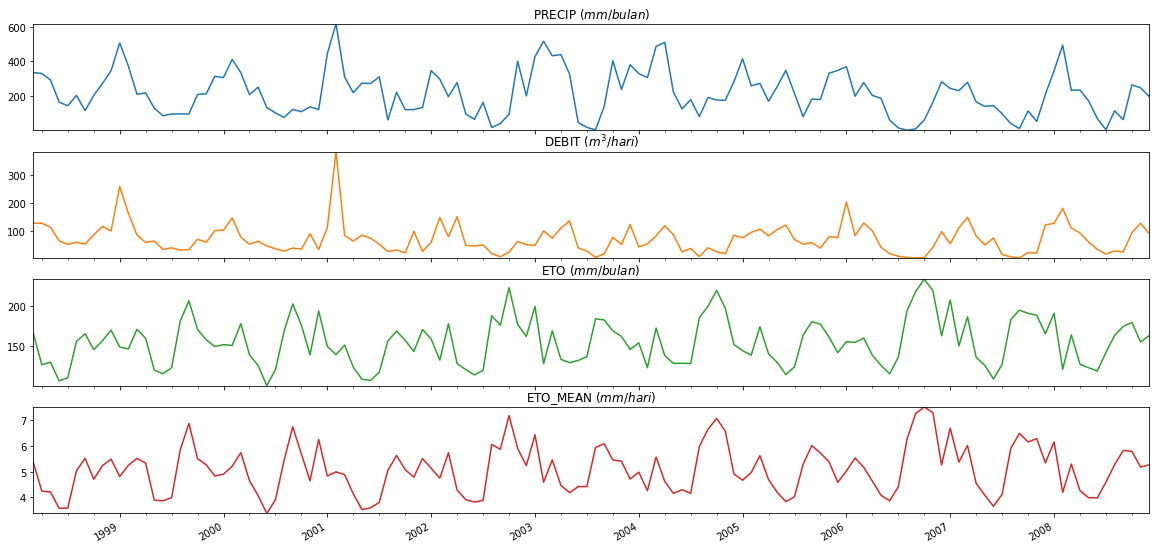

In [ ]:
print(':: GRAFIK HUJAN DAN DEBIT [data_bulanan]')
if _SHOW_IMAGES:
    data_bulanan[['precip', 'debit', 'eto', 'eto_mean']].plot(
        subplots=True, sharex=True, 
        title=['PRECIP ($mm/bulan$)',
            'DEBIT ($m^3/hari$)',
            'ETO ($mm/bulan$)',
            'ETO_MEAN ($mm/hari$)'],
        figsize=(20, 10), legend=False);

#### 2 Periode

In [ ]:
_ndays = '16D'

print(':: MEMBUAT REKAP 2 PERIODE')
hujan_2p = hk98.summary_station(
    dataset_concept, column='ch', ufunc=hujan_func, ufunc_col=hujan_func_col,
    n_days=_ndays
    ).droplevel(0, axis=1)

eto_2p = hk98.summary_station(
    dataset_concept, column='eto', 
    ufunc=[np.sum, np.mean], ufunc_col=['eto', 'eto_mean'],
    n_days=_ndays
    ).droplevel(0, axis=1)

debit_2p = hk98.summary_station(
    dataset_concept, column='debit', ufunc=np.mean, ufunc_col='debit',
    n_days=_ndays
    ).droplevel(0, axis=1)

data_2p = pd.concat([hujan_2p, eto_2p, debit_2p], axis=1)
print(':: MENAMPILKAN INFO [data_2p]')
data_2p.info()

:: MEMBUAT REKAP 2 PERIODE
:: MENAMPILKAN INFO [data_2p]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 1998-03-01 to 2008-12-17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   precip    260 non-null    float64
 1   nrain     260 non-null    float64
 2   ndays     260 non-null    float64
 3   eto       260 non-null    float64
 4   eto_mean  260 non-null    float64
 5   debit     260 non-null    float64
dtypes: float64(6)
memory usage: 14.2 KB


:: GRAFIK HUJAN DAN DEBIT [data_2p]


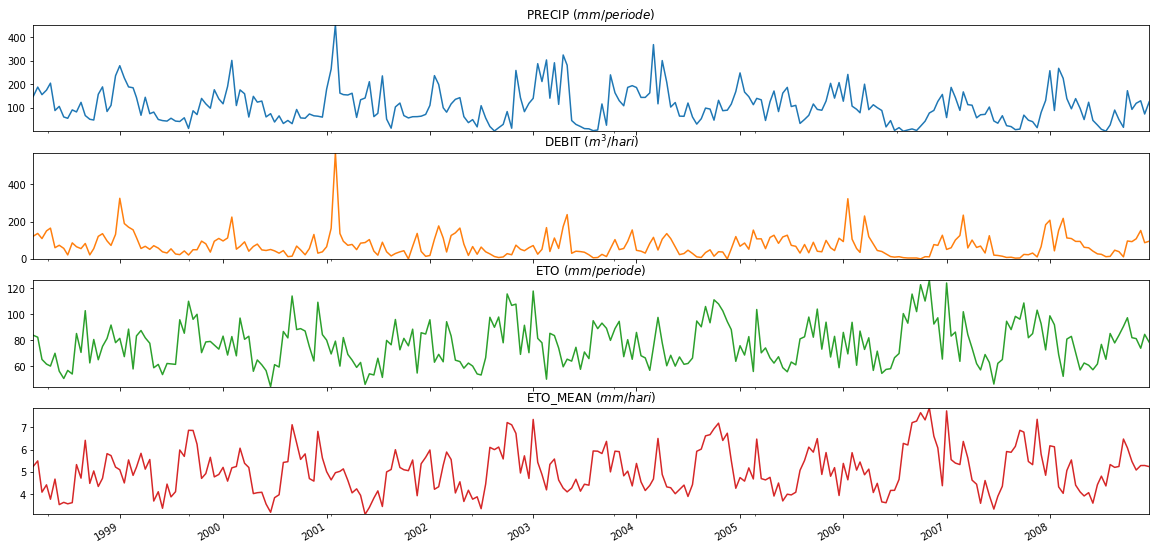

In [ ]:
print(':: GRAFIK HUJAN DAN DEBIT [data_2p]')
if _SHOW_IMAGES:
    data_2p[['precip', 'debit', 'eto', 'eto_mean']].plot(
        subplots=True, sharex=True, 
        title=['PRECIP ($mm/periode$)',
            'DEBIT ($m^3/hari$)',
            'ETO ($mm/periode$)',
            'ETO_MEAN ($mm/hari$)'],
        figsize=(20, 10), legend=False);

## INPUT MODEL DEEP LEARNING

Train Set diakhiri pada tanggal 31 Desember 2006, dan Test set dimulai dari tanggal 1 Januari 2007. Input model untuk ANN berupa tensor 2 dimensi sedangkan untuk RNN berupa tensor 3 dimensi. Input model variasi RNN sama dengan input model RNN.

### Dataset

In [ ]:
import seaborn as sns

In [ ]:
def plot_corr_mat(df, savefig=_SAVE_IMAGE):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.tight_layout()
    sns.heatmap(
            corr, mask=mask, cmap='RdGy', 
            center=0, square=True, robust=True, 
            linewidth=.5, cbar_kws={'shrink':.7}, annot=True, ax=ax,
            fmt='.2f',
            annot_kws={'fontsize':'large'})
    ax.set_title('Matriks Korelasi Dataset', fontweight='bold', fontsize='xx-large')

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_korelasi_matriks.png',
            dpi=150)  

    return fig, ax

def plot_pairplot(df, savefig=_SAVE_IMAGE):
    grid = sns.pairplot(df, markers='+')
    fig = grid.fig
    fig.set_size_inches(15, 15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.suptitle('Grafik PairPlot Dataset', fontweight='bold', fontsize='xx-large')

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_pairplot_dataset.png',
            dpi=150)  

    return grid

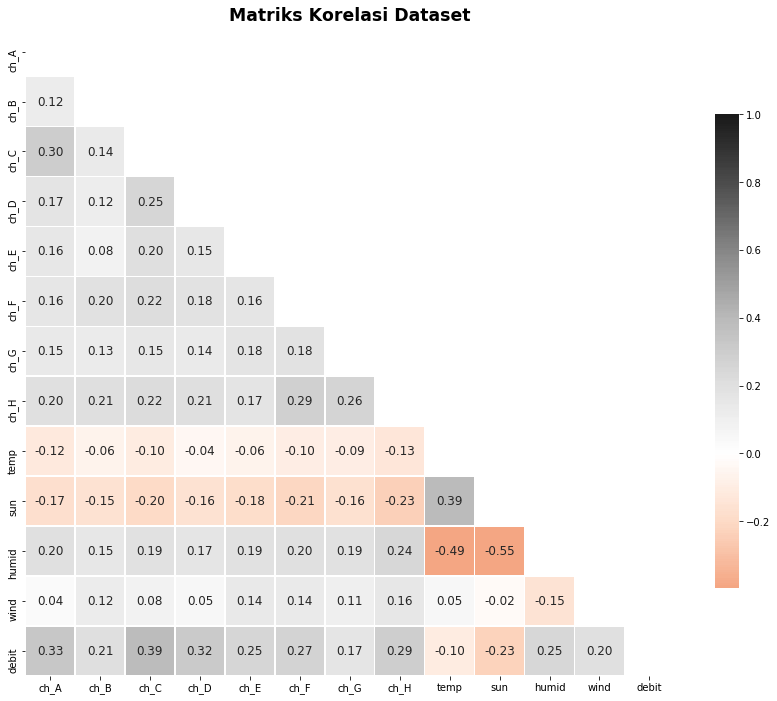

In [ ]:
plot_corr_mat(raw_dataset);

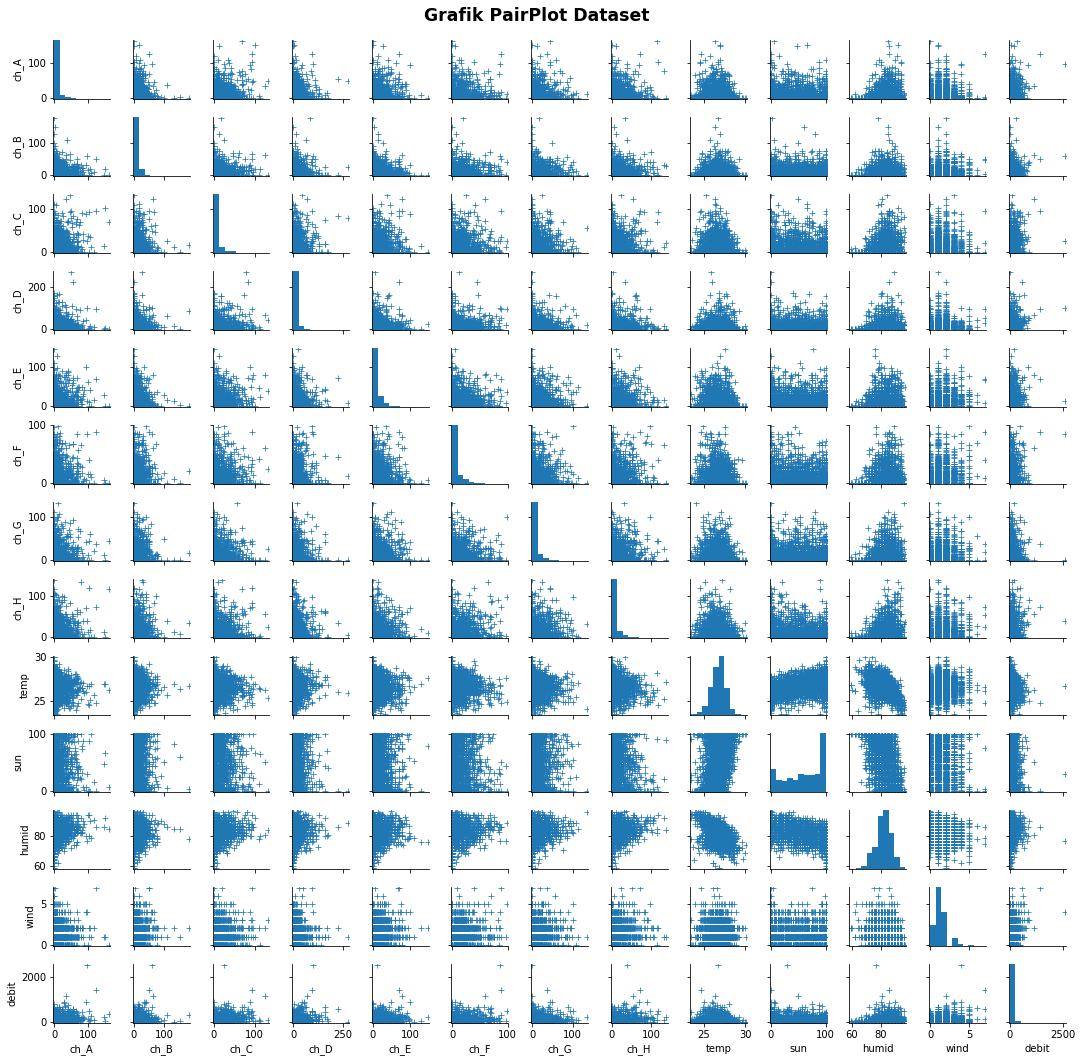

In [ ]:
plot_pairplot(raw_dataset);

### Prapemrosesan dataset

In [ ]:
_SLICE_TRAIN = slice(None, '20061231')
_SLICE_TEST = slice('20070101', None)

print(':: MEMISAHKAN DATA UNTUK TRAINING DAN TEST')
dataset_nn = raw_dataset.copy()
nn_train = raw_dataset[_SLICE_TRAIN]
nn_test = raw_dataset[_SLICE_TEST]

:: MEMISAHKAN DATA UNTUK TRAINING DAN TEST


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print(':: NORMALISASI DATASET')
nn_train_scale = nn_train.copy()
nn_train_scale[:] = sc.fit_transform(nn_train[:])
nn_test_scale = nn_test.copy()
nn_test_scale[:] = sc.transform(nn_test[:])
dataset_nn_normalized = pd.concat([nn_train_scale, nn_test_scale], axis=0)

:: NORMALISASI DATASET


In [ ]:
sc_y = StandardScaler()
sc_y.scale_, sc_y.mean_, sc_y.var_, sc_y.n_samples_seen_ = (
    sc.scale_[-1], sc.mean_[-1], sc.var_[-1], sc.n_samples_seen_
)

### ANN

In [ ]:
def train_test_split_ann(data, timesteps, date_start, target_column=None):
    feature_column = (
        data.columns[:-1] if target_column is None else
        data.drop(target_column, axis=1) 
    )

    table_ts = timeseries.timestep_table(
        data, columns=feature_column, keep_first=False,
        timesteps=timesteps
    )

    train = table_ts.loc[slice(None, date_start)][:-1]
    test = table_ts.loc[slice(date_start, None)]

    return train, test

In [ ]:
_test_date_start = '20070101'
ann_train_ts5, ann_test_ts5 = train_test_split_ann(
    dataset_nn_normalized, 5, _test_date_start
)

ann_train_ts10, ann_test_ts10 = train_test_split_ann(
    dataset_nn_normalized, 10, _test_date_start
)

ann_train_ts365, ann_test_ts365 = train_test_split_ann(
    dataset_nn_normalized, 365, _test_date_start
)

print(f'ann_train_ts5.shape = {ann_train_ts5.shape}')
print(f'ann_test_ts5.shape = {ann_test_ts5.shape}')
print(f'ann_train_ts10.shape = {ann_train_ts10.shape}')
print(f'ann_test_ts10.shape = {ann_test_ts10.shape}')
print(f'ann_train_ts365.shape = {ann_train_ts365.shape}')
print(f'ann_test_ts365.shape = {ann_test_ts365.shape}')

ann_train_ts5.shape = (3223, 61)
ann_test_ts5.shape = (731, 61)
ann_train_ts10.shape = (3218, 121)
ann_test_ts10.shape = (731, 121)
ann_train_ts365.shape = (2863, 4381)
ann_test_ts365.shape = (731, 4381)


### RNN/LSTM/GRU

In [ ]:
def train_test_split_rnn(data, timesteps, date_start,
                         feature_columns=None, target_column=None):

    feature_columns = (
        data.columns.to_list()[:-1] if feature_columns is None else
        feature_columns
    )

    target_column = (
        data.columns.to_list()[-1:] if target_column is None else
        target_column
    )

    rnn_X, rnn_y = hk53.tensor_array(
        data, X_columns=feature_columns,
        timesteps=timesteps,
        y_out=True, y_columns=target_column
    )

    ix_split = data.index.get_loc(date_start) - timesteps

    X_train = rnn_X[:ix_split, :, :]
    y_train = rnn_y[:ix_split]

    X_test = rnn_X[ix_split:, :, :]
    y_test = rnn_y[ix_split:]
    
    return (X_train, y_train), (X_test, y_test)


In [ ]:
((rnn_X_train_ts5, rnn_y_train_ts5),
 (rnn_X_test_ts5, rnn_y_test_ts5)) = (
     train_test_split_rnn(
         dataset_nn_normalized, 5, _test_date_start
     )
 )

((rnn_X_train_ts10, rnn_y_train_ts10),
 (rnn_X_test_ts10, rnn_y_test_ts10)) = (
     train_test_split_rnn(
         dataset_nn_normalized, 10, _test_date_start
     )
 )

((rnn_X_train_ts365, rnn_y_train_ts365),
 (rnn_X_test_ts365, rnn_y_test_ts365)) = (
     train_test_split_rnn(
         dataset_nn_normalized, 365, _test_date_start
     )
 )

In [ ]:
print(f'rnn_X_train_ts5.shape = {rnn_X_train_ts5.shape}')
print(f'rnn_y_train_ts5.shape = {rnn_y_train_ts5.shape}')
print(f'rnn_X_test_ts5.shape = {rnn_X_test_ts5.shape}')
print(f'rnn_y_test_ts5.shape = {rnn_y_test_ts5.shape}')
print('='*10)
print(f'rnn_X_train_ts10.shape = {rnn_X_train_ts10.shape}')
print(f'rnn_y_train_ts10.shape = {rnn_y_train_ts10.shape}')
print(f'rnn_X_test_ts10.shape = {rnn_X_test_ts10.shape}')
print(f'rnn_y_test_ts10.shape = {rnn_y_test_ts10.shape}')
print('='*10)
print(f'rnn_X_train_ts365.shape = {rnn_X_train_ts365.shape}')
print(f'rnn_y_train_ts365.shape = {rnn_y_train_ts365.shape}')
print(f'rnn_X_test_ts365.shape = {rnn_X_test_ts365.shape}')
print(f'rnn_y_test_ts365.shape = {rnn_y_test_ts365.shape}')

rnn_X_train_ts5.shape = (3223, 5, 12)
rnn_y_train_ts5.shape = (3223,)
rnn_X_test_ts5.shape = (731, 5, 12)
rnn_y_test_ts5.shape = (731,)
rnn_X_train_ts10.shape = (3218, 10, 12)
rnn_y_train_ts10.shape = (3218,)
rnn_X_test_ts10.shape = (731, 10, 12)
rnn_y_test_ts10.shape = (731,)
rnn_X_train_ts365.shape = (2863, 365, 12)
rnn_y_train_ts365.shape = (2863,)
rnn_X_test_ts365.shape = (731, 365, 12)
rnn_y_test_ts365.shape = (731,)


# TAHAP 4: MODEL KONSEPTUAL

Implementasi model NRECA dan FJMOCK dibahas sebelumnya pada `LI-#3`.

## Metrik

In [ ]:
def _slice_in_index(df, date_start, date_end):
    dfc = df.copy()
    dfc['index'] = np.arange(0, dfc.shape[0])
    sub = dfc[slice(date_start, date_end)]
    return slice(sub['index'].iloc[0], sub['index'].iloc[-1] + 1)

def nse_bulanan_0608(simulasi, observasi):
    sim = simulasi[slice_bulanan0608]
    obs = observasi[slice_bulanan0608]
    return he.nse(sim, obs)

def nse_2p_0608(simulasi, observasi):
    sim = simulasi[slice_2p0608]
    obs = observasi[slice_2p0608]
    return he.nse(sim, obs)

slice_bulanan0608 = _slice_in_index(data_bulanan, '2006', '2008')
slice_2p0608 = _slice_in_index(data_2p, '2006', '2008')

metrics_bulanan = [he.rmse, he.r_squared, he.nse, nse_bulanan_0608]
metrics_2p = [he.rmse, he.r_squared, he.nse, nse_2p_0608]

metrics_parameter = {
    'met_names': ['RMSE', 'R2', 'NSE', 'NSE0608'],
    'met_sort': 'NSE',
    'met_min': False
}

## NRECA

### Kode & Parameter

In [ ]:
print(':: MEMODIFIKASI FUNGSI .model_NRECA')
def model_NRECA_custom(df, precip_col, pet_col, ndays_col,
                MSTOR, GSTOR, PSUB, GWF, CF, C, AREA,
                as_df=True):

    nreca = hk89.model_NRECA(
        df=df, precip_col=precip_col, pet_col=pet_col,
        MSTOR=MSTOR, GSTOR=GSTOR, PSUB=PSUB, GWF=GWF, CF=CF, C=C, AREA=AREA,
                as_df=True, report='flow'
    )

    nreca['DISCHARGE'] = (
        (nreca['FLOW']/1000) * AREA / (df[ndays_col] * 24 * 60 * 60))
    nreca.drop(['FLOW'], axis=1, inplace=True)
    if as_df is True:
        return nreca
    else:
        return nreca['DISCHARGE'].values

def plot_hidrograf(
    df, sim_col, obs_col,
    title='NRECA', add_title='Bulanan', 
    slice_model=None, obs_df=None,
    params_kws=None,
    savefig=_SAVE_IMAGE):
    fig, ax = plt.subplots(figsize=(20, 5))

    if slice_model is None:
        slice_model = slice(None, None)

    df.loc[slice_model, sim_col].plot(ax=ax, style='-', label='SIMULASI')

    if obs_df is None:
        df.loc[slice_model, obs_col].plot(
            ax=ax, style='--', label='OBSERVASI')
    else:
        obs_df.loc[slice_model, obs_col].plot(
            ax=ax, style='--', label='OBSERVASI')


    ax.set_title(
        f'GRAFIK PERBANDINGAN SIMULASI {title} DAN OBSERVASI ({add_title})',
        fontsize='xx-large', fontweight='bold')
    ax.set_ylabel('Debit $m^3/s$')
    ax.set_xlabel('Tanggal')
    ax.legend()
    ax.grid(True, axis='both')

    if params_kws is not None:
        _val = [f'${{{key}}}$:${{{value:.2f}}}$' for key, value in params_kws.items()]
        ax.text(0.01, 0.95, '$PARAMETER$\n'+'\n'.join(_val), transform=ax.transAxes,
                ha='left', va='top',
                bbox=dict(boxstyle='square', fc='w', alpha=0.6, ec='k'))

    fig.tight_layout()

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_hidrograf_{}_{}.png'.format(
                clean_title(title), clean_title(add_title), 
            ), 
            dpi=150)  

    return fig, ax

:: MEMODIFIKASI FUNGSI .model_NRECA


In [ ]:
def obs_val(obs_df):
    return obs_df.loc[:, 'debit'].values

calib_nreca_params = {
    'MSTOR': [1000],
    'GSTOR': [100],
    'PSUB': np.arange(0.1, 0.9, 0.005),
    'GWF': np.arange(0.1, 0.9, 0.005), 
}

func_nreca_params = {
    'CF': 0.6,
    'C': 0.25,
    'AREA': 1450.6e6,

    'ndays_col': 'ndays',
    'precip_col': 'precip',
    'pet_col':'eto',
    'as_df': False,
}

### Bulanan

In [ ]:
func_nreca_params['df'] = data_bulanan

if _USE_CALIBRATED_MODEL:
    print(':: USING CALIBRATED MODEL')
    nreca_res_bulanan = pd.read_csv(
        _DIRECTORY / _CALD_NRECA_BULANAN, index_col=0
    )
else:
    with timeit_context('cal_nreca_bulanan'):
        nreca_res_bulanan = hk90.calibration(
            observed=data_bulanan, observed_func=obs_val,
            func=model_NRECA_custom, calibration_parameter=calib_nreca_params,
            func_parameter=func_nreca_params,
            metrics=metrics_bulanan,
            **metrics_parameter
        )
    nreca_res_bulanan.to_csv(_DIRECTORY / _CALD_NRECA_BULANAN)

:: USING CALIBRATED MODEL


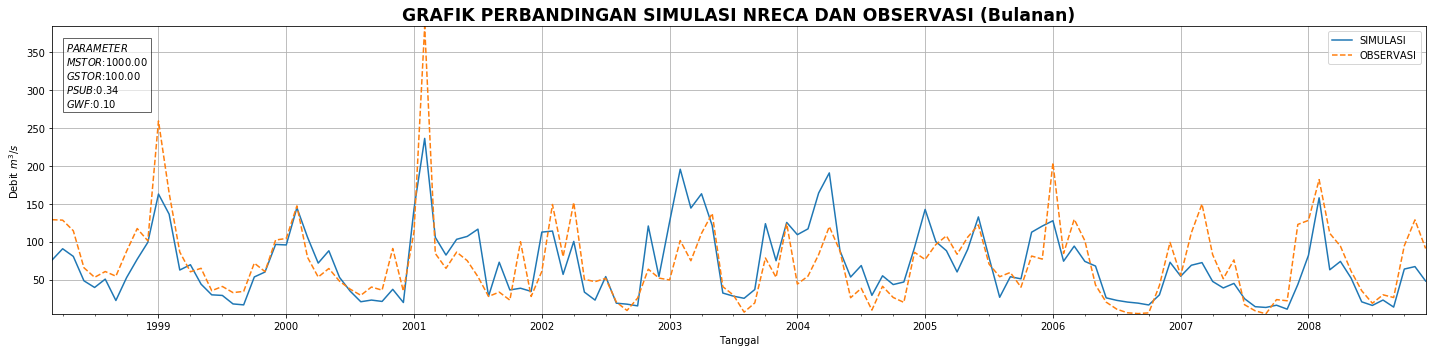

In [ ]:
nreca_bulanan_best = hk90._best_parameter(nreca_res_bulanan, calib_nreca_params)
func_nreca_params['df'] = data_bulanan
func_nreca_params['as_df'] = True
nreca_bulanan = model_NRECA_custom(**func_nreca_params, **nreca_bulanan_best)
if _SHOW_IMAGES:
    plot_hidrograf(nreca_bulanan, 'DISCHARGE', 'debit', obs_df=data_bulanan,
               params_kws=nreca_bulanan_best)

### 2 Periode

In [ ]:
from hidrokit.contrib.taruma import hk90

func_nreca_params['df'] = data_2p
func_nreca_params['as_df'] = False

if _USE_CALIBRATED_MODEL:
    print(':: USING CALIBRATED MODEL')
    nreca_res_2p = pd.read_csv(
        _DIRECTORY / _CALD_NRECA_2p, index_col=0
    )
else:
    with timeit_context('cal_nreca_2p'):
        nreca_res_2p = hk90.calibration(
            observed=data_2p, observed_func=obs_val,
            func=model_NRECA_custom, calibration_parameter=calib_nreca_params,
            func_parameter=func_nreca_params,
            metrics=metrics_2p,
            **metrics_parameter
        )
    nreca_res_2p.to_csv(_DIRECTORY / _CALD_NRECA_2p)

:: USING CALIBRATED MODEL


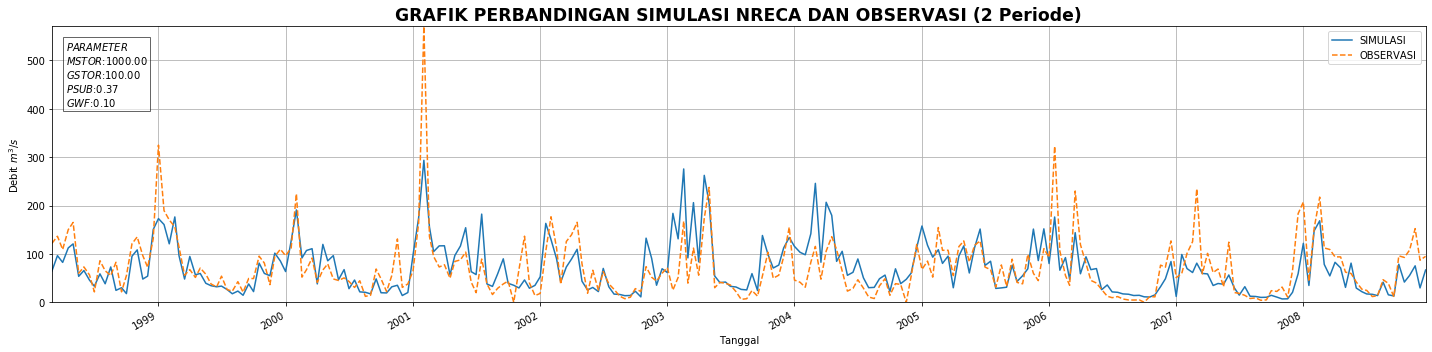

In [ ]:
nreca_2p_best = hk90._best_parameter(nreca_res_2p, calib_nreca_params)
func_nreca_params['df'] = data_2p
func_nreca_params['as_df'] = True
nreca_2p = model_NRECA_custom(**func_nreca_params, **nreca_2p_best)
if _SHOW_IMAGES:
    plot_hidrograf(
        df=nreca_2p, sim_col='DISCHARGE', obs_col='debit', obs_df=data_2p,
        title='NRECA', add_title='2 Periode',
        params_kws=nreca_2p_best)

## FJMOCK

### Parameter

In [ ]:
calib_fjmock_params = {
    'EXSURF': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'IF':  np.arange(0.1, 0.9, 0.05),
    'K': np.arange(0.1, 0.9, 0.05), 
    'PF': np.arange(0.01, 0.6, 0.05), 
    'ISMC': [300],
    'GSOM': [300],    
}

func_fjmock_params = {
    'precip_col': 'precip',
    'ep_col': 'eto_mean',
    'nrain_col': 'nrain',
    'ndays_col': 'ndays',
    'AREA': 1450.6e6,

    'as_df': False,
}

### Bulanan

In [ ]:
from hidrokit.contrib.taruma import hk96
func_fjmock_params['df'] = data_bulanan

if _USE_CALIBRATED_MODEL:
    print(':: USING CALIBRATED MODEL')
    fjmock_res_bulanan = pd.read_csv(
        _DIRECTORY / _CALD_FJMOCK_BULANAN, index_col=0
    )
else:
    with timeit_context('cal_fjmock_bulanan'):
        fjmock_res_bulanan = hk90.calibration(
            observed=data_bulanan, observed_func=obs_val,
            func=hk96.model_FJMOCK, calibration_parameter=calib_fjmock_params,
            func_parameter=func_fjmock_params,
            metrics=metrics_bulanan,
            **metrics_parameter
        )
    fjmock_res_bulanan.to_csv(_DIRECTORY / _CALD_FJMOCK_BULANAN)

:: USING CALIBRATED MODEL


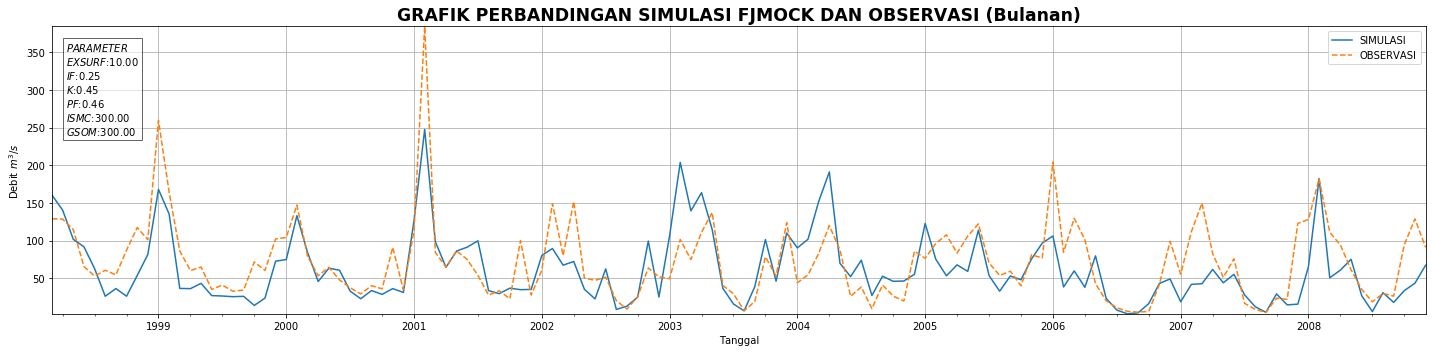

In [ ]:
fjmock_bulanan_best = hk90._best_parameter(
    fjmock_res_bulanan, calib_fjmock_params)
func_fjmock_params['as_df'] = True
func_fjmock_params['df'] = data_bulanan
fjmock_bulanan = hk96.model_FJMOCK(
    **func_fjmock_params, **fjmock_bulanan_best)
if _SHOW_IMAGES:
    plot_hidrograf(
        df=fjmock_bulanan, sim_col='FLOW', obs_col='debit', obs_df=data_bulanan,
        title='FJMOCK', add_title='Bulanan',
        params_kws=fjmock_bulanan_best)

### 2 Periode

In [ ]:
from hidrokit.contrib.taruma import hk96
func_fjmock_params['df'] = data_2p
func_fjmock_params['as_df'] = False

if _USE_CALIBRATED_MODEL:
    print(':: USING CALIBRATED MODEL')
    fjmock_res_2p = pd.read_csv(
        _DIRECTORY / _CALD_FJMOCK_2p, index_col=0
    )
else:
    with timeit_context('cal_fjmock_2p'):
        fjmock_res_2p = hk90.calibration(
            observed=data_2p, observed_func=obs_val,
            func=hk96.model_FJMOCK, calibration_parameter=calib_fjmock_params,
            func_parameter=func_fjmock_params,
            metrics=metrics_2p,
            **metrics_parameter
        )
    fjmock_res_2p.to_csv(_DIRECTORY / _CALD_FJMOCK_2p)

:: USING CALIBRATED MODEL


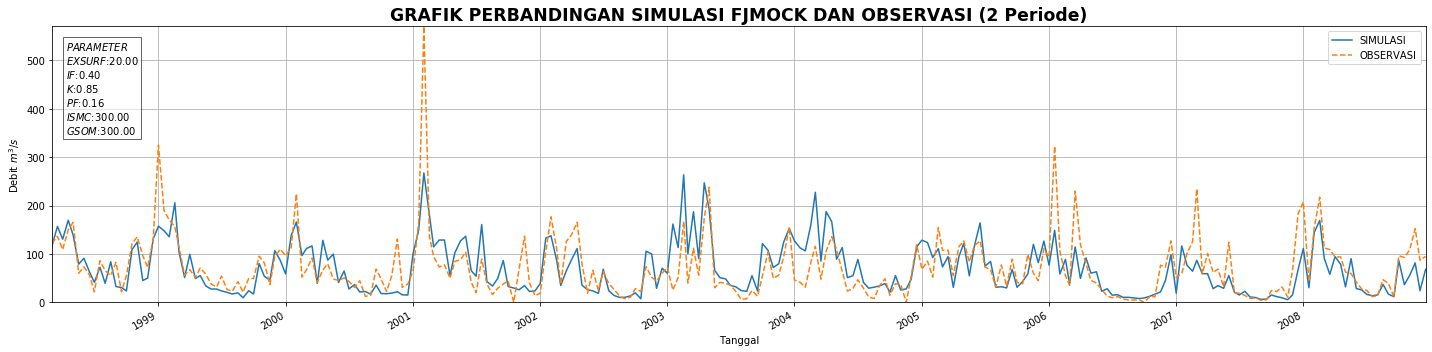

In [ ]:
fjmock_2p_best = hk90._best_parameter(fjmock_res_2p, calib_fjmock_params)
func_fjmock_params['as_df'] = True
func_fjmock_params['df'] = data_2p
fjmock_2p = hk96.model_FJMOCK(**func_fjmock_params, **fjmock_2p_best)
if _SHOW_IMAGES:
    plot_hidrograf(
        df=fjmock_2p, sim_col='FLOW', obs_col='debit', obs_df=data_2p,
        title='FJMOCK', add_title='2 Periode',
        params_kws=fjmock_2p_best)

# TAHAP 5: MODEL DEEP LEARNING

_loss function_ yang digunakan adalah _mean squared error_ dengan optimisasi `adam`. Pada saat pelatihan juga menggunakan _callback_ `EarlyStopping` dengan parameter `patience=50` yang mengacu pada nilai _loss function_. Nilai _batch size_ yang digunakan sebesar 30. 

Berikut konfigurasi model _deep learning_ yang digunakan:

___Artificial Neural Networks_ (ANN) / (_Multi Layer Perceptron_ (MLP))__

Dimensi _input layer_ mengikuti nilai _timesteps_ yang digunakan dikalikan dengan jumlah _feature_-nya (Vektor input berdimensi $timesteps \times feature$). Pada model ini, menggunakan 2 _hidden layers_ dengan $30$ neuron yang diikuti dengan _dropout layer_ dengan $rate=0.1$. Output layer merupakan nilai tunggal. Seluruh fungsi aktivasi (kecuali pada output layer) menggunakan fungsi sigmoid. Untuk model ANN, nilai maksimum epoch sebanyak 1000. 

__Variasi _Recurrent Neural Networks_ (RNN)__

Mengikuti pada `LI-#3`, konfigurasi untuk seluruh variasi RNN yaitu 2 _recurrent layer_ dengan 20 neuron yang diikuti dengan _dropout layer_ ($rate=0.1$). Output layer merupakan nilai tunggal. Nilai maksimum epoch yang digunakan sebanyak 1000 (untuk _timesteps_ 5 hari dan 10 hari) dan 50 (untuk _timesteps_ 365 hari). Dipilih nilai maksimum 50 epoch untuk _timesteps_ 365 hari dikarenakan untuk mempercepat pelatihan model.

In [ ]:
import tensorflow.keras.backend as K

print(':: MEMBUAT FUNGSI KHUSUS METRIK (NSE, R_SQUARED)')

def nse(y_true, y_pred):
    # ref: https://hydroerr.readthedocs.io/en/stable/api/HydroErr.HydroErr.nse.html
    S, O = y_pred, y_true
    O_mean = K.mean(O)
    top = K.sum(K.square(S-O))
    bot = K.sum(K.square(O-O_mean))
    NSE = 1 - (top / bot)
    return NSE

def r_squared(y_true, y_pred):
    # ref: https://hydroerr.readthedocs.io/en/stable/api/HydroErr.HydroErr.r_squared.html
    S, O = y_pred, y_true
    O_mean = K.mean(O)
    S_mean = K.mean(S)

    _top = (O-O_mean) * (S-S_mean)
    top = K.square(K.sum(_top))

    bot = K.sum(K.square(O-O_mean)) * K.sum(K.square(S-S_mean))

    R_squared = top / bot
    return R_squared

_custom_objects = {'nse':nse, 'r_squared':r_squared}

:: MEMBUAT FUNGSI KHUSUS METRIK (NSE, R_SQUARED)


In [ ]:
es = EarlyStopping(monitor='loss', mode='min', patience=50, verbose=1)

In [ ]:
def save_history_to_csv(history, path):
    df = pd.DataFrame(history.history)
    df.to_csv(path)
    return df

In [ ]:
def concat_train_test(model, X_train, y_train, X_test, y_test, df, ts):
    dfindex = df[ts:].index

    sim_train = model.predict(X_train).flatten()
    sim_test = model.predict(X_test).flatten()
    sim = np.concatenate([sim_train, sim_test], axis=0)
    real_sim = sc_y.inverse_transform(sim)
    
    obs = np.concatenate([y_train, y_test], axis=0)
    real_obs = sc_y.inverse_transform(obs)

    result = pd.DataFrame(
        index=dfindex,
        data=np.stack([real_sim, real_obs], axis=1),
        columns=['SIMULATED', 'OBSERVED']
    )

    return result

## ANN

Konfigurasi:

- INPUT LAYER: input berupa $\in \mathbb{R}^{a \times b}$ dengan $a = (observasi - timesteps), b=timesteps \times feature$. dengan target $\in \mathbb{R}^{a}$.
- HIDDEN LAYER 1: 30 neuron, dengan fungsi aktivasi sigmoid
- DROPOUT LAYER 1: probabilitas 10%
- HIDDEN LAYER 2: 30 neuron, dengan fungsi aktivasi sigmoid
- DROPOUT LAYER 2: probabilitas 10%
- OUTPUT LAYER: 1 neuron

Parameter `optimizer=adam`, `loss='mean_squared_error'`, `metrics=['mae', nse, r_squared]`.

In [ ]:
def xy_split(data):
    return data.values[:, :-1], data.values[:, -1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def ann_model(input_shape):
    model = Sequential()
    model.add(Dense(30, activation='sigmoid', input_dim=input_shape))
    model.add(Dropout(0.1))
    model.add(Dense(30, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mae', nse, r_squared])
    return model

### timesteps = 5

In [ ]:
ann_X_train_ts5, ann_y_train_ts5 = xy_split(ann_train_ts5)
ann_X_test_ts5, ann_y_test_ts5 = xy_split(ann_test_ts5)
model_ann_ts5 = ann_model(ann_X_train_ts5.shape[1])
model_ann_ts5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_ann_ts5 = load_model(
        _DIRECTORY / _TRAINED_ANN_MODEL_TS5, custom_objects=_custom_objects)
    history_ann_ts5 = pd.read_csv(_DIRECTORY / _ANN_HISTORY_TS5, index_col=0)
else:
    with timeit_context('train_ann_ts5'):
        history_ann_ts5 = model_ann_ts5.fit(
            ann_X_train_ts5, ann_y_train_ts5, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_ann_ts5.save(_DIRECTORY / _TRAINED_ANN_MODEL_TS5)
    history_ann_ts5 = save_history_to_csv(
        history_ann_ts5, _DIRECTORY / _ANN_HISTORY_TS5
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_ann_ts5 = concat_train_test(
    model_ann_ts5, 
    ann_X_train_ts5, ann_y_train_ts5, 
    ann_X_test_ts5, ann_y_test_ts5, 
    dataset_nn, ts=5)

### timesteps = 10

In [ ]:
ann_X_train_ts10, ann_y_train_ts10 = xy_split(ann_train_ts10)
ann_X_test_ts10, ann_y_test_ts10 = xy_split(ann_test_ts10)
model_ann_ts10 = ann_model(ann_X_train_ts10.shape[1])
model_ann_ts10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                3630      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_ann_ts10 = load_model(
        _DIRECTORY / _TRAINED_ANN_MODEL_TS10, custom_objects=_custom_objects)
    history_ann_ts10 = pd.read_csv(_DIRECTORY / _ANN_HISTORY_TS10, index_col=0)
else:
    with timeit_context('train_ann_ts10'):
        history_ann_ts10 = model_ann_ts10.fit(
            ann_X_train_ts10, ann_y_train_ts10, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_ann_ts10.save(_DIRECTORY / _TRAINED_ANN_MODEL_TS10)
    history_ann_ts10 = save_history_to_csv(
        history_ann_ts10, _DIRECTORY / _ANN_HISTORY_TS10
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_ann_ts10 = concat_train_test(
    model_ann_ts10, 
    ann_X_train_ts10, ann_y_train_ts10, 
    ann_X_test_ts10, ann_y_test_ts10, dataset_nn, ts=10)

### timesteps = 365

In [ ]:
ann_X_train_ts365, ann_y_train_ts365 = xy_split(ann_train_ts365)
ann_X_test_ts365, ann_y_test_ts365 = xy_split(ann_test_ts365)
model_ann_ts365 = ann_model(ann_X_train_ts365.shape[1])
model_ann_ts365.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                131430    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 132,391
Trainable params: 132,391
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_ann_ts365 = load_model(
        _DIRECTORY / _TRAINED_ANN_MODEL_TS365, custom_objects=_custom_objects)
    history_ann_ts365 = pd.read_csv(_DIRECTORY / _ANN_HISTORY_TS365, index_col=0)
else:
    with timeit_context('train_ann_ts365'):
        history_ann_ts365 = model_ann_ts365.fit(
            ann_X_train_ts365, ann_y_train_ts365, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_ann_ts365.save(_DIRECTORY / _TRAINED_ANN_MODEL_TS365)
    history_ann_ts365 = save_history_to_csv(
        history_ann_ts365, _DIRECTORY / _ANN_HISTORY_TS365
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_ann_ts365 = concat_train_test(
    model_ann_ts365, 
    ann_X_train_ts365, ann_y_train_ts365, 
    ann_X_test_ts365, ann_y_test_ts365, 
    dataset_nn, ts=365)

## RNN

Konfigurasi:

- INPUT LAYER: tensor, $\in \mathbb{R}^{a \times b \times c}$ dengan $a = (observasi - timesteps), b=timesteps, c=feature$ dengan target $\in \mathbb{R}^{a}$.
- RECURRENT LAYER 1: SimpleRNN, 20 neuron
- DROPOUT LAYER 1: probabilitas 10%
- RECURRENT LAYER 2: SimpleRNN, 20 neuron
- DROPOUT LAYER 2: probabilitas 10%
- OUTPUT LAYER: 1 neuron

Parameter `optimizer=adam`, `loss='mean_squared_error'`, `metrics=['mae', nse, r_squared]`.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

def rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(20, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(20, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mae', nse, r_squared])
    return model

### timesteps = 5

In [ ]:
model_rnn_ts5 = rnn_model(input_shape=(5, rnn_X_train_ts5.shape[2]))
model_rnn_ts5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5, 20)             660       
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 20)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_rnn_ts5 = load_model(
        _DIRECTORY / _TRAINED_RNN_MODEL_TS5, custom_objects=_custom_objects)
    history_rnn_ts5 = pd.read_csv(_DIRECTORY / _RNN_HISTORY_TS5, index_col=0)
else:
    with timeit_context('train_rnn_ts5'):
        history_rnn_ts5 = model_rnn_ts5.fit(
            rnn_X_train_ts5, rnn_y_train_ts5, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_rnn_ts5.save(_DIRECTORY / _TRAINED_RNN_MODEL_TS5)
    history_rnn_ts5 = save_history_to_csv(
        history_rnn_ts5, _DIRECTORY / _RNN_HISTORY_TS5
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_rnn_ts5 = concat_train_test(
    model_rnn_ts5, 
    rnn_X_train_ts5, rnn_y_train_ts5, 
    rnn_X_test_ts5, rnn_y_test_ts5, 
    dataset_nn, ts=5)

### timesteps = 10

In [ ]:
model_rnn_ts10 = rnn_model(input_shape=(10, rnn_X_train_ts10.shape[2]))
model_rnn_ts10.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 20)            660       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 20)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_rnn_ts10 = load_model(
        _DIRECTORY / _TRAINED_RNN_MODEL_TS10, custom_objects=_custom_objects)
    history_rnn_ts10 = pd.read_csv(_DIRECTORY / _RNN_HISTORY_TS10, index_col=0)
else:
    with timeit_context('train_rnn_ts10'):
        history_rnn_ts10 = model_rnn_ts10.fit(
            rnn_X_train_ts10, rnn_y_train_ts10, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_rnn_ts10.save(_DIRECTORY / _TRAINED_RNN_MODEL_TS10)
    history_rnn_ts10 = save_history_to_csv(
        history_rnn_ts10, _DIRECTORY / _RNN_HISTORY_TS10
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_rnn_ts10 = concat_train_test(
    model_rnn_ts10, 
    rnn_X_train_ts10, rnn_y_train_ts10, 
    rnn_X_test_ts10, rnn_y_test_ts10, 
    dataset_nn, ts=10)

### timesteps = 365

In [ ]:
model_rnn_ts365 = rnn_model(input_shape=(365, rnn_X_train_ts365.shape[2]))
model_rnn_ts365.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 365, 20)           660       
_________________________________________________________________
dropout_10 (Dropout)         (None, 365, 20)           0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_rnn_ts365 = load_model(
        _DIRECTORY / _TRAINED_RNN_MODEL_TS365, custom_objects=_custom_objects)
    history_rnn_ts365 = pd.read_csv(_DIRECTORY / _RNN_HISTORY_TS365, index_col=0)
else:
    with timeit_context('train_rnn_ts365'):
        history_rnn_ts365 = model_rnn_ts365.fit(
            rnn_X_train_ts365, rnn_y_train_ts365, 
            epochs=50, batch_size=30, verbose=0, 
            callbacks=[es])
    model_rnn_ts365.save(_DIRECTORY / _TRAINED_RNN_MODEL_TS365)
    history_rnn_ts365 = save_history_to_csv(
        history_rnn_ts365, _DIRECTORY / _RNN_HISTORY_TS365
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_rnn_ts365 = concat_train_test(
    model_rnn_ts365, 
    rnn_X_train_ts365, rnn_y_train_ts365, 
    rnn_X_test_ts365, rnn_y_test_ts365, 
    dataset_nn, ts=365)

## LSTM

Konfigurasi:

- INPUT LAYER: tensor, $\in \mathbb{R}^{a \times b \times c}$ dengan $a = (observasi - timesteps), b=timesteps, c=feature$ dengan target $\in \mathbb{R}^{a}$.
- RECURRENT LAYER 1: LSTM, 20 neuron
- DROPOUT LAYER 1: probabilitas 10%
- RECURRENT LAYER 2: LSTM, 20 neuron
- DROPOUT LAYER 2: probabilitas 10%
- OUTPUT LAYER: 1 neuron

Parameter `optimizer=adam`, `loss='mean_squared_error'`, `metrics=['mae', nse, r_squared]`.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(20, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(LSTM(20, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mae', nse, r_squared])
    return model

### timesteps = 5

In [ ]:
model_lstm_ts5 = lstm_model(input_shape=(5, rnn_X_train_ts5.shape[2]))
model_lstm_ts5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 20)             2640      
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 20)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 5,941
Trainable params: 5,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_lstm_ts5 = load_model(
        _DIRECTORY / _TRAINED_LSTM_MODEL_TS5, custom_objects=_custom_objects)
    history_lstm_ts5 = pd.read_csv(_DIRECTORY / _LSTM_HISTORY_TS5, index_col=0)
else:
    with timeit_context('train_lstm_ts5'):
        history_lstm_ts5 = model_lstm_ts5.fit(
            rnn_X_train_ts5, rnn_y_train_ts5, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_lstm_ts5.save(_DIRECTORY / _TRAINED_LSTM_MODEL_TS5)
    history_lstm_ts5 = save_history_to_csv(
        history_lstm_ts5, _DIRECTORY / _LSTM_HISTORY_TS5
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_lstm_ts5 = concat_train_test(
    model_lstm_ts5, 
    rnn_X_train_ts5, rnn_y_train_ts5, 
    rnn_X_test_ts5, rnn_y_test_ts5, 
    dataset_nn, ts=5)

### timesteps = 10

In [ ]:
model_lstm_ts10 = lstm_model(input_shape=(10, rnn_X_train_ts10.shape[2]))
model_lstm_ts10.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 20)            2640      
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 5,941
Trainable params: 5,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_lstm_ts10 = load_model(
        _DIRECTORY / _TRAINED_LSTM_MODEL_TS10, custom_objects=_custom_objects)
    history_lstm_ts10 = pd.read_csv(_DIRECTORY / _LSTM_HISTORY_TS10, index_col=0)
else:
    with timeit_context('train_lstm_ts10'):
        history_lstm_ts10 = model_lstm_ts10.fit(
            rnn_X_train_ts10, rnn_y_train_ts10, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_lstm_ts10.save(_DIRECTORY / _TRAINED_LSTM_MODEL_TS10)
    history_lstm_ts10 = save_history_to_csv(
        history_lstm_ts10, _DIRECTORY / _LSTM_HISTORY_TS10
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_lstm_ts10 = concat_train_test(
    model_lstm_ts10, 
    rnn_X_train_ts10, rnn_y_train_ts10, 
    rnn_X_test_ts10, rnn_y_test_ts10, 
    dataset_nn, ts=10)

### timesteps = 365

In [ ]:
model_lstm_ts365 = lstm_model(input_shape=(365, rnn_X_train_ts365.shape[2]))
model_lstm_ts365.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 365, 20)           2640      
_________________________________________________________________
dropout_16 (Dropout)         (None, 365, 20)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 5,941
Trainable params: 5,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_lstm_ts365 = load_model(
        _DIRECTORY / _TRAINED_LSTM_MODEL_TS365, custom_objects=_custom_objects)
    history_lstm_ts365 = pd.read_csv(_DIRECTORY / _LSTM_HISTORY_TS365, index_col=0)
else:
    with timeit_context('train_lstm_ts365'):
        history_lstm_ts365 = model_lstm_ts365.fit(
            rnn_X_train_ts365, rnn_y_train_ts365, 
            epochs=50, batch_size=30, verbose=0, 
            callbacks=[es])
    model_lstm_ts365.save(_DIRECTORY / _TRAINED_LSTM_MODEL_TS365)
    history_lstm_ts365 = save_history_to_csv(
        history_lstm_ts365, _DIRECTORY / _LSTM_HISTORY_TS365
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_lstm_ts365 = concat_train_test(
    model_lstm_ts365, 
    rnn_X_train_ts365, rnn_y_train_ts365, 
    rnn_X_test_ts365, rnn_y_test_ts365, 
    dataset_nn, ts=365)

## GRU

Konfigurasi:

- INPUT LAYER: tensor, $\in \mathbb{R}^{a \times b \times c}$ dengan $a = (observasi - timesteps), b=timesteps, c=feature$ dengan target $\in \mathbb{R}^{a}$.
- RECURRENT LAYER 1: GRU, 20 neuron
- DROPOUT LAYER 1: probabilitas 10%
- RECURRENT LAYER 2: GRU, 20 neuron
- DROPOUT LAYER 2: probabilitas 10%
- OUTPUT LAYER: 1 neuron

Parameter `optimizer=adam`, `loss='mean_squared_error'`, `metrics=['mae', nse, r_squared]`.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

def gru_model(input_shape):
    model = Sequential()
    model.add(GRU(20, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(GRU(20, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=['mae', nse, r_squared])
    return model

### timesteps = 5

In [ ]:
model_gru_ts5 = gru_model(input_shape=(5, rnn_X_train_ts5.shape[2]))
model_gru_ts5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 20)             2040      
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 20)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dropout_19 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_gru_ts5 = load_model(
        _DIRECTORY / _TRAINED_GRU_MODEL_TS5, custom_objects=_custom_objects)
    history_gru_ts5 = pd.read_csv(_DIRECTORY / _GRU_HISTORY_TS5, index_col=0)
else:
    with timeit_context('train_gru_ts5'):
        history_gru_ts5 = model_gru_ts5.fit(
            rnn_X_train_ts5, rnn_y_train_ts5, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_gru_ts5.save(_DIRECTORY / _TRAINED_GRU_MODEL_TS5)
    history_gru_ts5 = save_history_to_csv(
        history_gru_ts5, _DIRECTORY / _GRU_HISTORY_TS5
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_gru_ts5 = concat_train_test(
    model_gru_ts5, 
    rnn_X_train_ts5, rnn_y_train_ts5, 
    rnn_X_test_ts5, rnn_y_test_ts5, 
    dataset_nn, ts=5)

### timesteps = 10

In [ ]:
model_gru_ts10 = gru_model(input_shape=(10, rnn_X_train_ts10.shape[2]))
model_gru_ts10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 20)            2040      
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dropout_21 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_gru_ts10 = load_model(
        _DIRECTORY / _TRAINED_GRU_MODEL_TS10, custom_objects=_custom_objects)
    history_gru_ts10 = pd.read_csv(_DIRECTORY / _GRU_HISTORY_TS10, index_col=0)
else:
    with timeit_context('train_gru_ts10'):
        history_gru_ts10 = model_gru_ts10.fit(
            rnn_X_train_ts10, rnn_y_train_ts10, 
            epochs=1000, batch_size=30, verbose=0, 
            callbacks=[es])
    model_gru_ts10.save(_DIRECTORY / _TRAINED_GRU_MODEL_TS10)
    history_gru_ts10 = save_history_to_csv(
        history_gru_ts10, _DIRECTORY / _GRU_HISTORY_TS10
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_gru_ts10 = concat_train_test(
    model_gru_ts10, 
    rnn_X_train_ts10, rnn_y_train_ts10, 
    rnn_X_test_ts10, rnn_y_test_ts10, dataset_nn, ts=10)

### timesteps = 365

In [ ]:
model_gru_ts365 = gru_model(input_shape=(365, rnn_X_train_ts365.shape[2]))
model_gru_ts365.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 365, 20)           2040      
_________________________________________________________________
dropout_22 (Dropout)         (None, 365, 20)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dropout_23 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if _USE_TRAINED_MODEL:
    print(':: USING TRAINED MODEL AND HISTORY')
    model_gru_ts365 = load_model(
        _DIRECTORY / _TRAINED_GRU_MODEL_TS365, custom_objects=_custom_objects)
    history_gru_ts365 = pd.read_csv(_DIRECTORY / _GRU_HISTORY_TS365, index_col=0)
else:
    with timeit_context('train_gru_ts365'):
        history_gru_ts365 = model_gru_ts365.fit(
            rnn_X_train_ts365, rnn_y_train_ts365, 
            epochs=50, batch_size=30, verbose=0, 
            callbacks=[es])
    model_gru_ts365.save(_DIRECTORY / _TRAINED_GRU_MODEL_TS365)
    history_gru_ts365 = save_history_to_csv(
        history_gru_ts365, _DIRECTORY / _GRU_HISTORY_TS365
    )

:: USING TRAINED MODEL AND HISTORY


In [ ]:
res_gru_ts365 = concat_train_test(
    model_gru_ts365, 
    rnn_X_train_ts365, rnn_y_train_ts365, 
    rnn_X_test_ts365, rnn_y_test_ts365, 
    dataset_nn, ts=365)

# TAHAP 6: VISUALISASI

Pada tahap ini menampilkan hasil dari pelatihan model menggunakan visualisasi. 

### Kode

In [ ]:
res_ann_list = [res_ann_ts5, res_ann_ts10, res_ann_ts365]
res_rnn_list = [res_rnn_ts5, res_rnn_ts10, res_rnn_ts365]
res_lstm_list = [res_lstm_ts5, res_lstm_ts10, res_lstm_ts365]
res_gru_list = [res_gru_ts5, res_gru_ts10, res_gru_ts365]
res_deep_list = [res_ann_list, res_rnn_list, res_lstm_list, res_gru_list]

## Grafik $R^2$

Grafik berikut menampilkan performa model dalam memprediksikan nilai debit.

### Kode

In [ ]:
def _calc_r2_res(df, slice_model):
    sim = df[slice_model].SIMULATED.values
    obs = df[slice_model].OBSERVED.values
    return he.r_squared(sim, obs)

def plot_r2_deep(model_list, slice_model, ts=5, ts_col=0, title='TRAIN SET',
                 savefig=_SAVE_IMAGE):
    fig, ax = plt.subplots(
        nrows=1, ncols=4, figsize=(20, 5)
    )
    _TITLE = ['ANN', 'RNN', 'LSTM', 'GRU']

    for i, dl_model in enumerate(model_list):
        data = dl_model[ts_col]
        sns.regplot(
            x='SIMULATED', y='OBSERVED', data=data[slice_model],
            ax=ax[i], marker='o',
            scatter_kws={'s':20, 'alpha':0.7}
        )
        ax[i].set_title('{}'.format(
            _TITLE[i]), fontweight='bold')
        ax[i].text(0.05, 0.95, '$R^2={{{:.5f}}}$'.format(
            _calc_r2_res(data, slice_model)), transform=ax[i].transAxes,
            ha='left', va='top', fontsize='large',
            bbox=dict(boxstyle='square', fc='w', alpha=0.6, ec='k'))
        ax[i].grid(True, axis='both')
    
    fig.suptitle(
        f'Grafik $R^2$, {title}, $timesteps={{{ts}}}\\ \\mathit{{hari}}$',
        size='xx-large', fontweight='bold', y=0.99
    )
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_r2_{}_ts{}.png'.format(
                clean_title(title), ts
            ), 
            dpi=150)

    return fig, ax

### Train Set

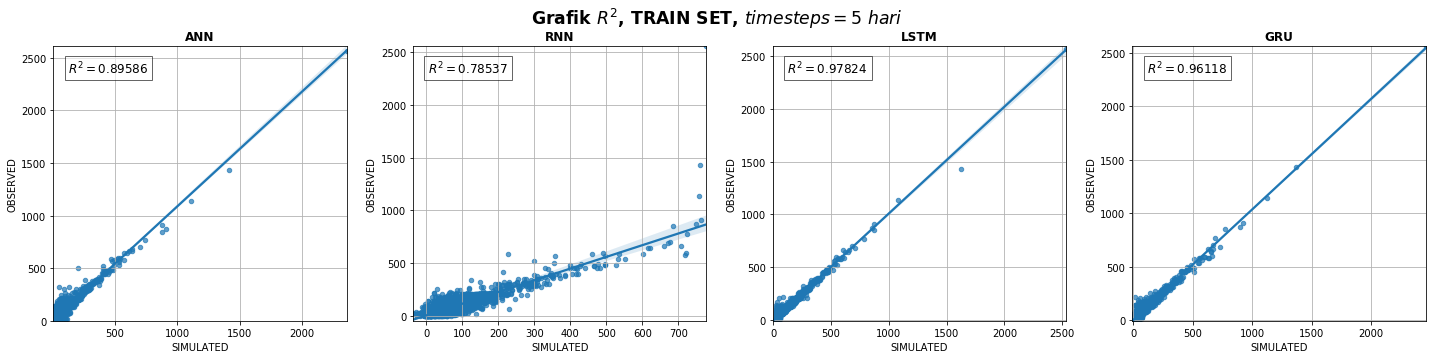

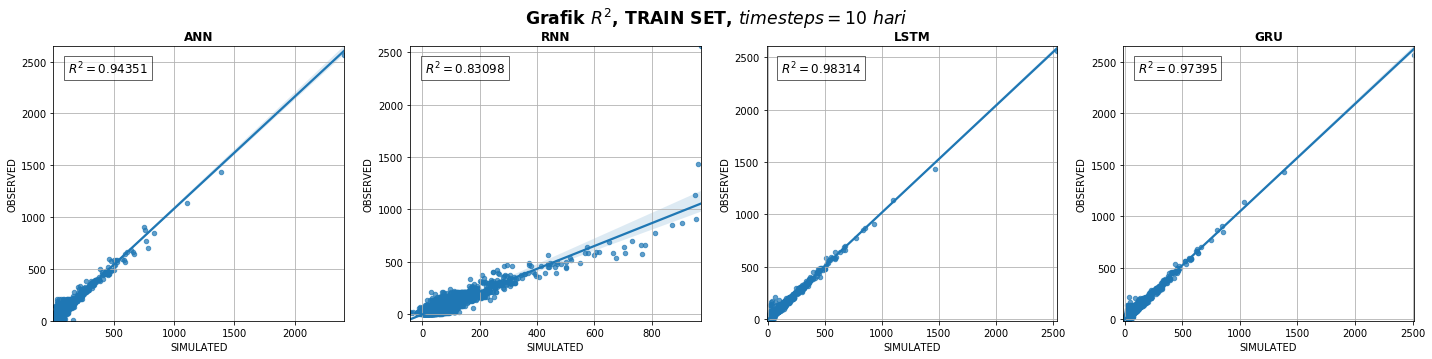

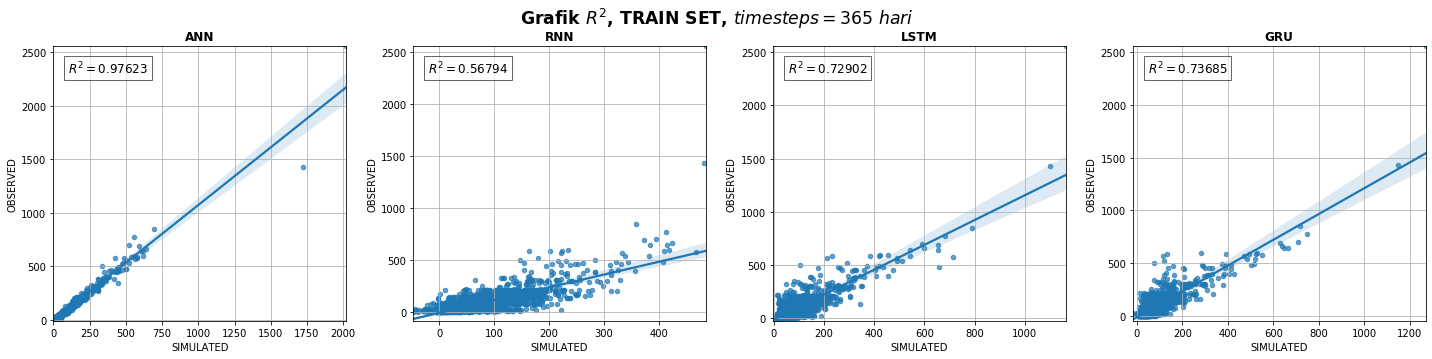

In [ ]:
if _SHOW_IMAGES:
    plot_r2_deep(
        res_deep_list, _SLICE_TRAIN, title='TRAIN SET', ts=5, ts_col=0)    
    plot_r2_deep(
        res_deep_list, _SLICE_TRAIN, title='TRAIN SET', ts=10, ts_col=1)
    plot_r2_deep(
        res_deep_list, _SLICE_TRAIN, title='TRAIN SET', ts=365, ts_col=2);

### Test Set

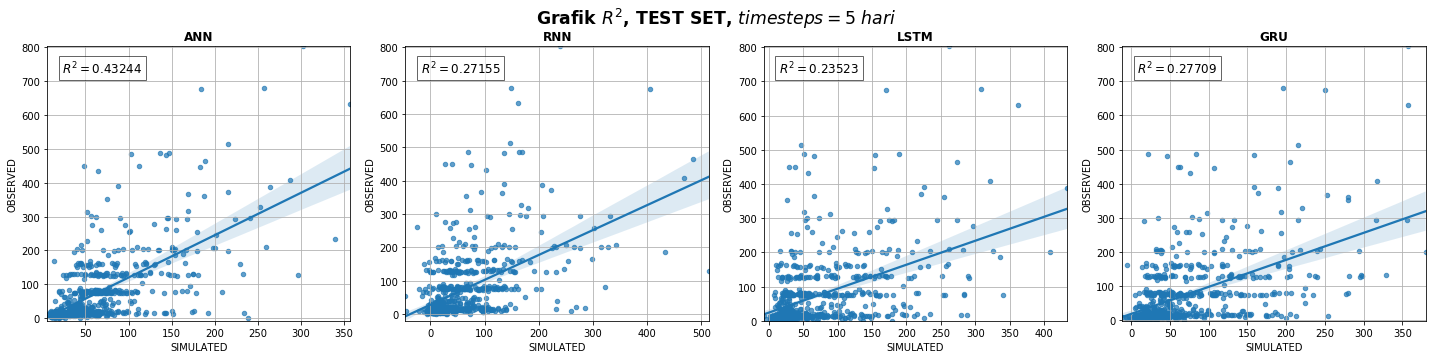

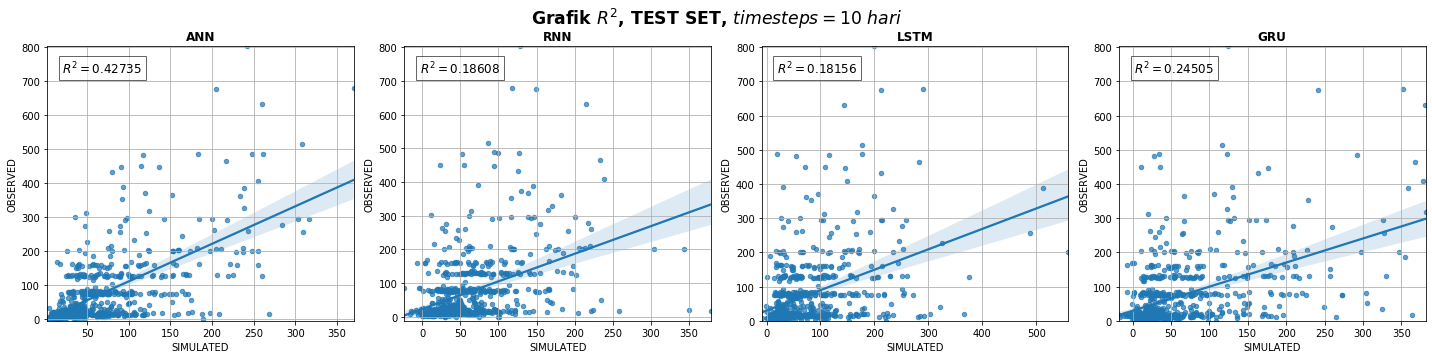

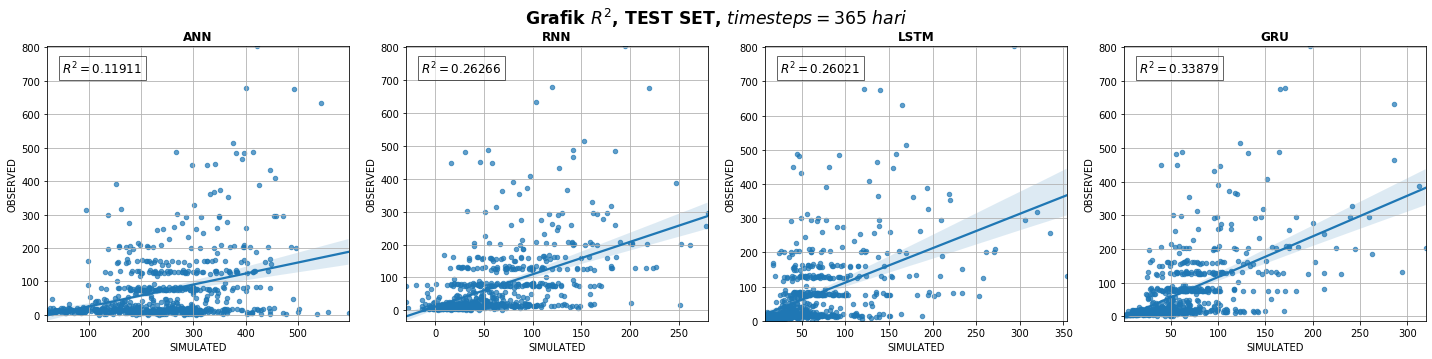

In [ ]:
if _SHOW_IMAGES:
    plot_r2_deep(
        res_deep_list, _SLICE_TEST, title='TEST SET', ts=5, ts_col=0)
    plot_r2_deep(
        res_deep_list, _SLICE_TEST, title='TEST SET', ts=10, ts_col=1)
    plot_r2_deep(
        res_deep_list, _SLICE_TEST, title='TEST SET', ts=365, ts_col=2);

## Perbandingan metrik terhadap _timesteps_

Grafik berikut menampilkan perbandingan metrik model terhadap _timesteps_ yang digunakan. Grafik dibuat terpisah antara _train set_ dan _test set_.

### Kode

In [ ]:
def calc_metrics_model(
        model_list, func, slice_model, model_name=['ANN', 'RNN', 'LSTM', 'GRU'],
        columns=['ts=5', 'ts=10', 'ts=365']
    ):

    val = {}
    for i, dl_model in enumerate(res_deep_list):
        name = model_name[i]

        r2 = []
        for ts_model in dl_model:
            sim = ts_model[slice_model].SIMULATED.values
            obs = ts_model[slice_model].OBSERVED.values
            r2.append(func(sim, obs))

        val[name] = r2

    df = pd.DataFrame(val).T
    df.columns = columns

    return df

def plot_metrics_deep(train, test, title='$R^2$', 
                      savefig=_SAVE_IMAGE):
    columns = train.columns.to_list()
    index = train.index.to_list()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    linestyle = ['-', '--', ':', '-.']
    marker = ['o', '*', 's', 'P']
    
    def _plot_single(i, model, ax, df, stitle=''):
        ax.plot(
            columns, df.loc[model], label=model,
            ls=linestyle[i], marker=marker[i], ms=10
        )
        ax.set_title(stitle, fontweight='bold')
        ax.set_ylabel('Nilai {}'.format(title))
        ax.set_xlabel('$timesteps$ (hari)')
        ax.margins(x=0.05, y=0.1)
        ax.legend(loc='best')
        ax.grid(True, axis='both')

    for i, model in enumerate(index):
        _plot_single(i, model, ax[0], train, stitle='TRAIN SET')
        _plot_single(i, model, ax[1], test, stitle='TEST SET')

    fig.suptitle('NILAI {} TERHADAP $timesteps$'.format(title),
                 size='xx-large', fontweight='bold', y=0.99)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    
    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_metrik_ts_{}.png'.format(
                clean_title(title)
            ), 
            dpi=150)
        
    return fig, ax

In [ ]:
df_r2_train = calc_metrics_model(res_deep_list, he.r_squared, _SLICE_TRAIN)
df_r2_test = calc_metrics_model(res_deep_list, he.r_squared, _SLICE_TEST)
df_mse_train = calc_metrics_model(res_deep_list, he.mse, _SLICE_TRAIN)
df_mse_test = calc_metrics_model(res_deep_list, he.mse, _SLICE_TEST)
df_nse_train = calc_metrics_model(res_deep_list, he.nse, _SLICE_TRAIN)
df_nse_test = calc_metrics_model(res_deep_list, he.nse, _SLICE_TEST)

### Grafik

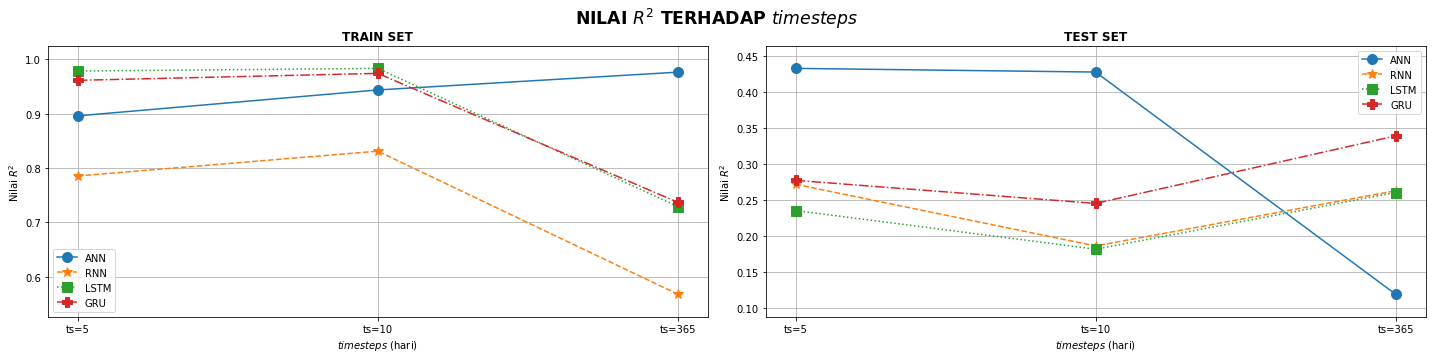

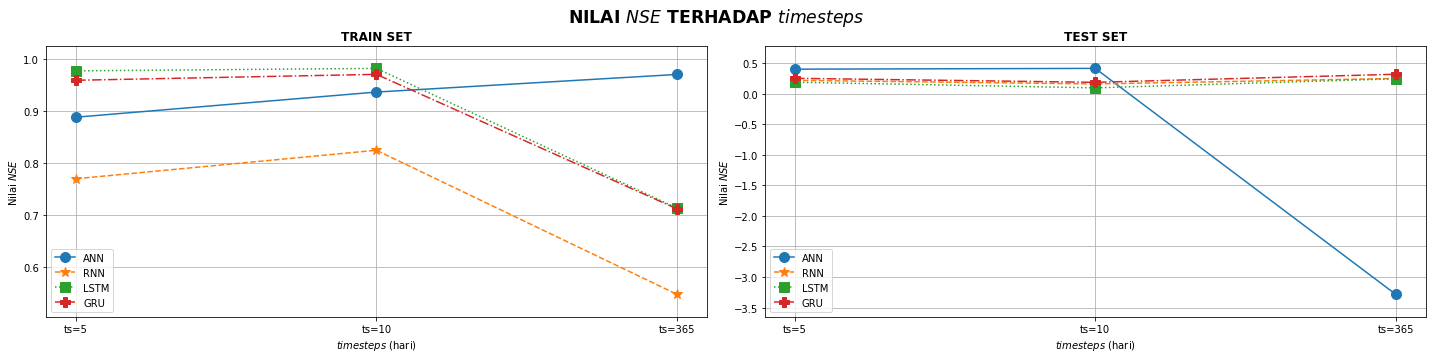

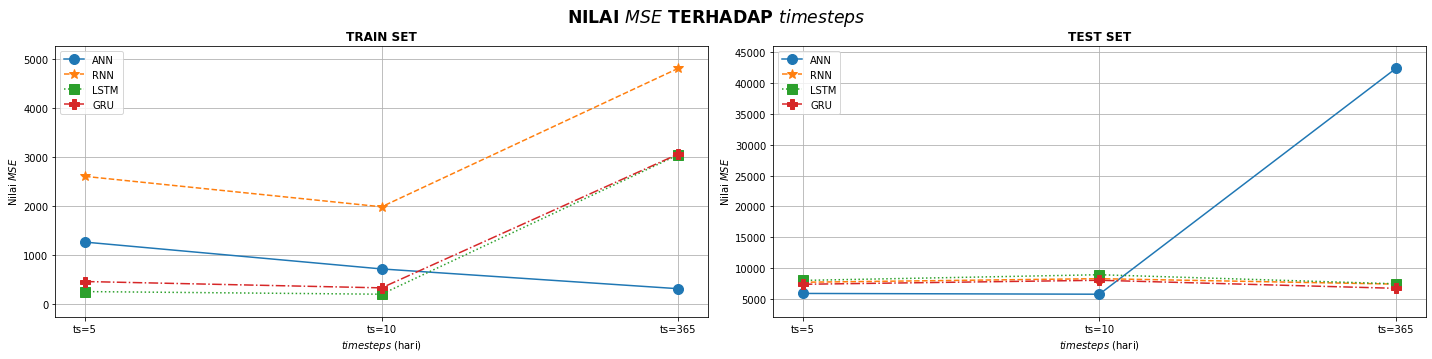

In [ ]:
if _SHOW_IMAGES:
    plot_metrics_deep(df_r2_train, df_r2_test, title='$R^2$')
    plot_metrics_deep(df_nse_train, df_nse_test, title='$NSE$')
    plot_metrics_deep(df_mse_train, df_mse_test, title='$MSE$')

## `history` model

Grafik berikut menampilkan hasil saat pelatihan model. Pada grafik terdapat dua komponen yaitu bar dan box. Bar digunakan untuk menampilkan nilai metrik terakhir saat mengakhiri pelatihan. Box digunakan untuk memberi gambaran distribusi nilai metrik saat pelatihan model. Dipilihnya box dikarenakan lebih praktis dilihat dan digambarkan berdampingan dengan nilai metrik. 

### Kode

In [ ]:
history_ann = [history_ann_ts5, history_ann_ts10, history_ann_ts365]
history_rnn = [history_rnn_ts5, history_rnn_ts10, history_rnn_ts365]
history_lstm = [history_lstm_ts5, history_lstm_ts10, history_lstm_ts365]
history_gru = [history_gru_ts5, history_gru_ts10, history_gru_ts365]
history_deep_list = [history_ann, history_rnn, history_lstm, history_gru]

In [ ]:
def plot_history_model(
    history_list, df_time, unpack_hist=False, metric_col='loss',
    slice_time=None, time_col=None, ylabel='loss', add_title='loss', 
    name_list=None, fmt_name=None, epoch_list=None,
    savefig=_SAVE_IMAGE
    ):
    fig, ax= plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 6),
                        gridspec_kw={'height_ratios':[1,4]})

    from itertools import chain

    if unpack_hist:
        history_list = list(chain.from_iterable(history_list))

    if name_list is None:
        fmt_name = (
            '${{{a}}}_{{ts=5}}$ ${{{a}}}_{{ts=10}}$ ${{{a}}}_{{ts=365}}$'
            if fmt_name is None else fmt_name) 
        name_list = list(
        chain.from_iterable(
            [fmt_name.format(a=x).split() 
            for x in 'ann rnn lstm gru'.upper().split()]
        )) if name_list is None else name_list

    epoch_list = (
        [1000]*3 + ([1000]*2 + [50])*3 if epoch_list is None else epoch_list)

    width = 1 
    k = 2 # number plot in each group 
    n = len(history_list)

    pos_start = np.array([i * (k * width + width) for i in range(n)])
    pos_start_k = np.array([pos_start + (i * width) for i in range(k)])
    pos_label = pos_start + (k * width / 2)

    # bar plot

    pos_bar = pos_start_k[0]
    val_bar = [history[metric_col].iloc[-1] for history in history_list]

    ax[1].bar(
        pos_bar, val_bar,
        width=width, align='edge', label='final epoch'
    )

    for i, val in enumerate(val_bar):
        ax[1].annotate(
            f'{val:.2f}', (pos_start_k[0][i] + width / 2, val), xytext=(0,5), 
            textcoords='offset points',
            ha='center', va='bottom', size='large', fontweight='bold'
        )
        
    # box plot

    val_box = [history[metric_col].values for history in history_list]

    ax[1].boxplot(
        val_box,
        notch=True, meanline=True,
        widths=width*0.5, showfliers=True,
        positions=pos_start_k[1] + width/2,
        flierprops={'marker':'o', 'markerfacecolor':'g', 'alpha':0.2}
    )

    # add text

    # EPOCH
    val_epoch = [history.shape[0] for history in history_list]

    for i, val in enumerate(val_epoch):
        text_epoch = (
            f'epoch:\n${{{val:}}}/{{{epoch_list[i]}}}$' if i==0 else 
            f'${{{val:}}}/{{{epoch_list[i]}}}$' )
        ax[0].text(
            pos_label[i], 0.0, text_epoch, ha='center', va='bottom',
            fontsize='large'
        )

    # DURATION
    time_col = 'duration' if time_col is None else time_col
    slice_time = (
        slice('train_ann_ts5', 'train_gru_ts365') if slice_time is None
        else slice_time)
    val_duration = df_time.loc[slice_time, time_col].values

    for i, val in enumerate(val_duration):
        text_duration = (
            f'duration:\n{val:.2f} min' if i==0 else 
            f'{val:.2f} min' )
        ax[0].text(
            pos_label[i], 0.6, text_duration, ha='center', va='bottom',
            fontsize='large', fontstyle='italic'
        )
        
    ax[0].axis('off')

    # LABEL
    ax[1].set_xlabel('MODEL')
    ax[1].set_ylabel(ylabel)
    ax[1].set_xticks(pos_label)
    ax[1].set_xticklabels(name_list)

    # DIVIDER
    for i in (pos_start - width/2)[1:]:
        ax[1].axvline(i, linestyle='--', alpha=0.5)
        ax[0].axvline(i, linestyle='--', alpha=0.5)

    ax[1].margins(x=0.01, y=0.1)
    ax[1].grid(True, axis='y')
    ax[1].legend()
    fig.suptitle(
        'PERBANDINGAN PELATIHAN MODEL ' + f'({add_title})',
        fontweight='bold', fontsize='xx-large')
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_history_model_{}.png'.format(
                clean_title(add_title)
            ), 
            dpi=150)

    return fig, ax
 

### Grafik

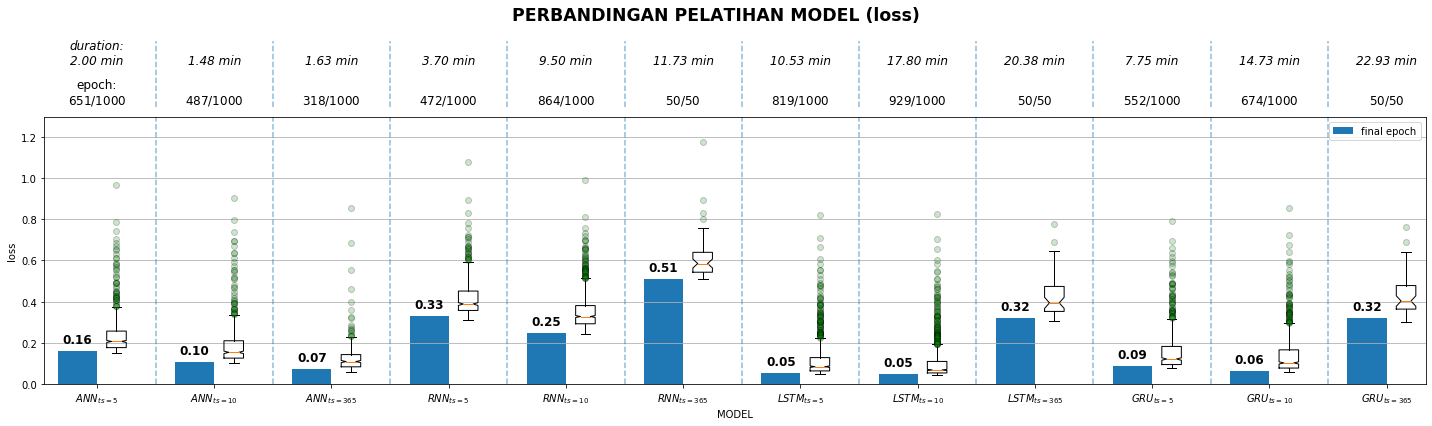

In [ ]:
if _RECORD_RUNNING: # IF NOT EMPTY
    df_record = pd.DataFrame.from_dict(
            _RECORD_RUNNING, orient='index', columns='start end duration'.split())
    df_record.to_csv(_DIRECTORY / _RECORDED_RUN)
else:    
    df_record = pd.read_csv(
        _DIRECTORY / _RECORDED_RUN, index_col=0
    )

if _SHOW_IMAGES:
    _metric = 'loss'
    plot_history_model(
        history_deep_list, df_record, unpack_hist=True, metric_col=_metric,
        ylabel=_metric, add_title=_metric);

## Rekap Data

Proses rekap data yang diterapkan pada model konseptual dilakukan juga pada hasil model _deep learning_ agar dapat dibandingkan nilainya. Dikarenakan pada model deep learning menggunakan timesteps 365 hari (1 tahun), maka pemotongan dataset juga dimajukan satu tahun kedepan dari yang sebelumnya 1 Maret 1998 menjadi 1 Maret 1999. 

In [ ]:
def concat_each_model(ts5, ts10, ts365):
    df = pd.concat([ts5, ts10, ts365], axis=1).drop('OBSERVED', axis=1)
    df.columns = ['ts=5', 'ts=10', 'ts=365']
    return df

def concat_all_model(model_list):
    _NAME_MODEL = 'ann rnn lstm gru'.split()
    _TS = '5 10 365'.split()

    res = []
    for model in res_deep_list:
        df = concat_each_model(*model)
        res.append(df)

    final = pd.concat(res, axis=1)
    final.columns = (
        ['_'.join(x) for x in product(_NAME_MODEL, _TS)]
    ) 

    return final

In [ ]:
df_deep_all = concat_all_model(res_deep_list)

In [ ]:
#ref: https://stackoverflow.com/a/46129367/4886384
with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    df_deep_bulanan = hk98.summary_all(
        df_deep_all, np.mean, 'MEAN').droplevel(1, axis=1)
    df_deep_2p = hk98.summary_all(
        df_deep_all, np.mean, 'MEAN', n_days=_ndays).droplevel(1, axis=1)

In [ ]:
df_concept_bulanan = pd.concat([nreca_bulanan, fjmock_bulanan], axis=1)
df_concept_bulanan.columns = ['nreca', 'fjmock']
df_concept_2p = pd.concat([nreca_2p, fjmock_2p], axis=1)
df_concept_2p.columns = ['nreca', 'fjmock']

In [ ]:
_slice_df_all = slice('19990301', None)

df_all_bulanan = pd.concat([df_concept_bulanan, df_deep_bulanan, data_bulanan['debit']], axis=1).loc[_slice_df_all]
df_all_2p = pd.concat([df_concept_2p, df_deep_2p, data_2p['debit']], axis=1).loc[_slice_df_all]
df_all_bulanan.rename({'debit':'observasi'}, axis=1, inplace=True)
df_all_2p.rename({'debit':'observasi'}, axis=1, inplace=True)


## Perbandingan Hidrograf

Grafik berikut membandingkan nilai debit dari masing-masing model terhadap nilai observasi. Perbandingan ini hanya menggunakan _test set_.

### Kode

In [ ]:
import matplotlib.dates as mdates

def plot_compare_deep_obs(df, slice_date, title_date='BULANAN', 
                          savefig=_SAVE_IMAGE):
    _name_m = 'ann rnn lstm gru'.split()

    fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20, 15))

    # import matplotlib.dates as mdates
    for i, m in enumerate(_name_m):
        _comp_m_obs = f'observasi {m}_5 {m}_10 {m}_365'.split()
        df.loc[slice_date, _comp_m_obs].plot(
            style=['ko-', '*--', 's:', 'P-.'], ax=ax[i])
        ax[i].set_ylabel('Debit $m^3/s$')
        ax[i].set_xlabel('Waktu')
        ax[i].set_title(m.upper(), size='x-large')
        ax[i].legend(fontsize='large', loc='upper right')
        ax[i].margins(y=0.1)
        # ax[i].minorticks_on()
        # ax[i].xaxis.set_major_locator(mdates.DayLocator())
        # ax[i].tick_params(axis='x',which='minor',left=False)
        ax[i].grid(True, axis='both', which='both')
    
    # fig.subplots_adjust(top=0.95)
    fig.suptitle('HIDROGRAF PERBANDINGAN MODEL DEEP LEARNING DENGAN OBSERVASI' + 
                 f' ({title_date})'.upper(), size='xx-large', fontweight='bold')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_hidrograf_{}.png'.format(
                clean_title(title_date)
            ), 
            dpi=150)

    return fig, ax

### Bulanan

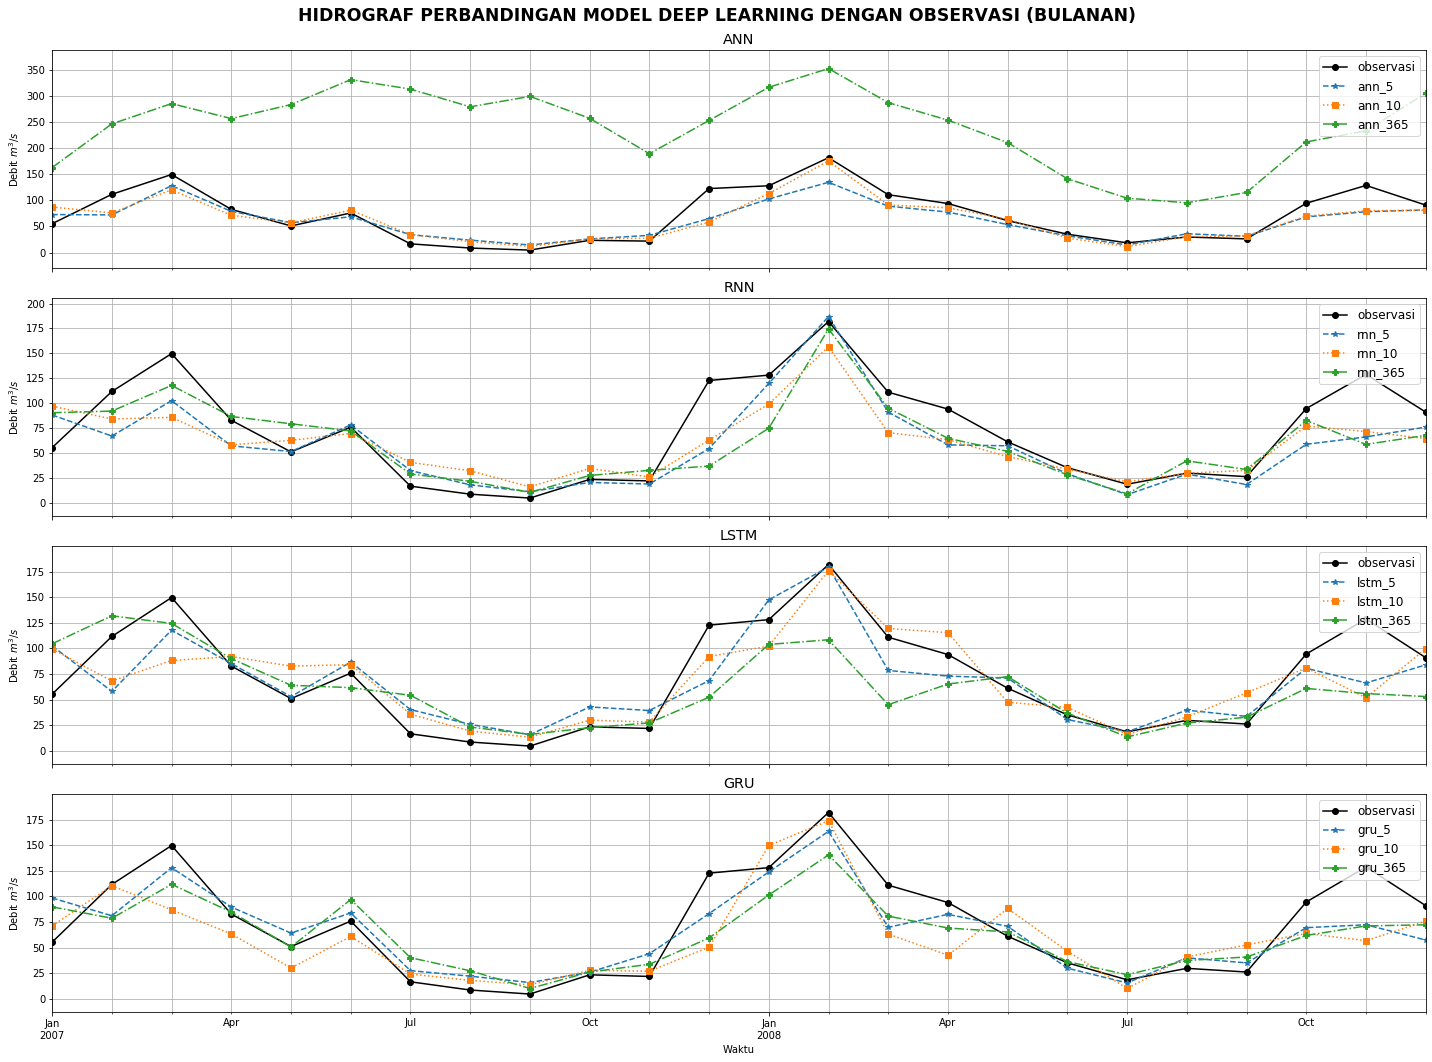

In [ ]:
if _SHOW_IMAGES:
    plot_compare_deep_obs(df_all_bulanan, _SLICE_TEST, title_date='bulanan');

### 2 Periode

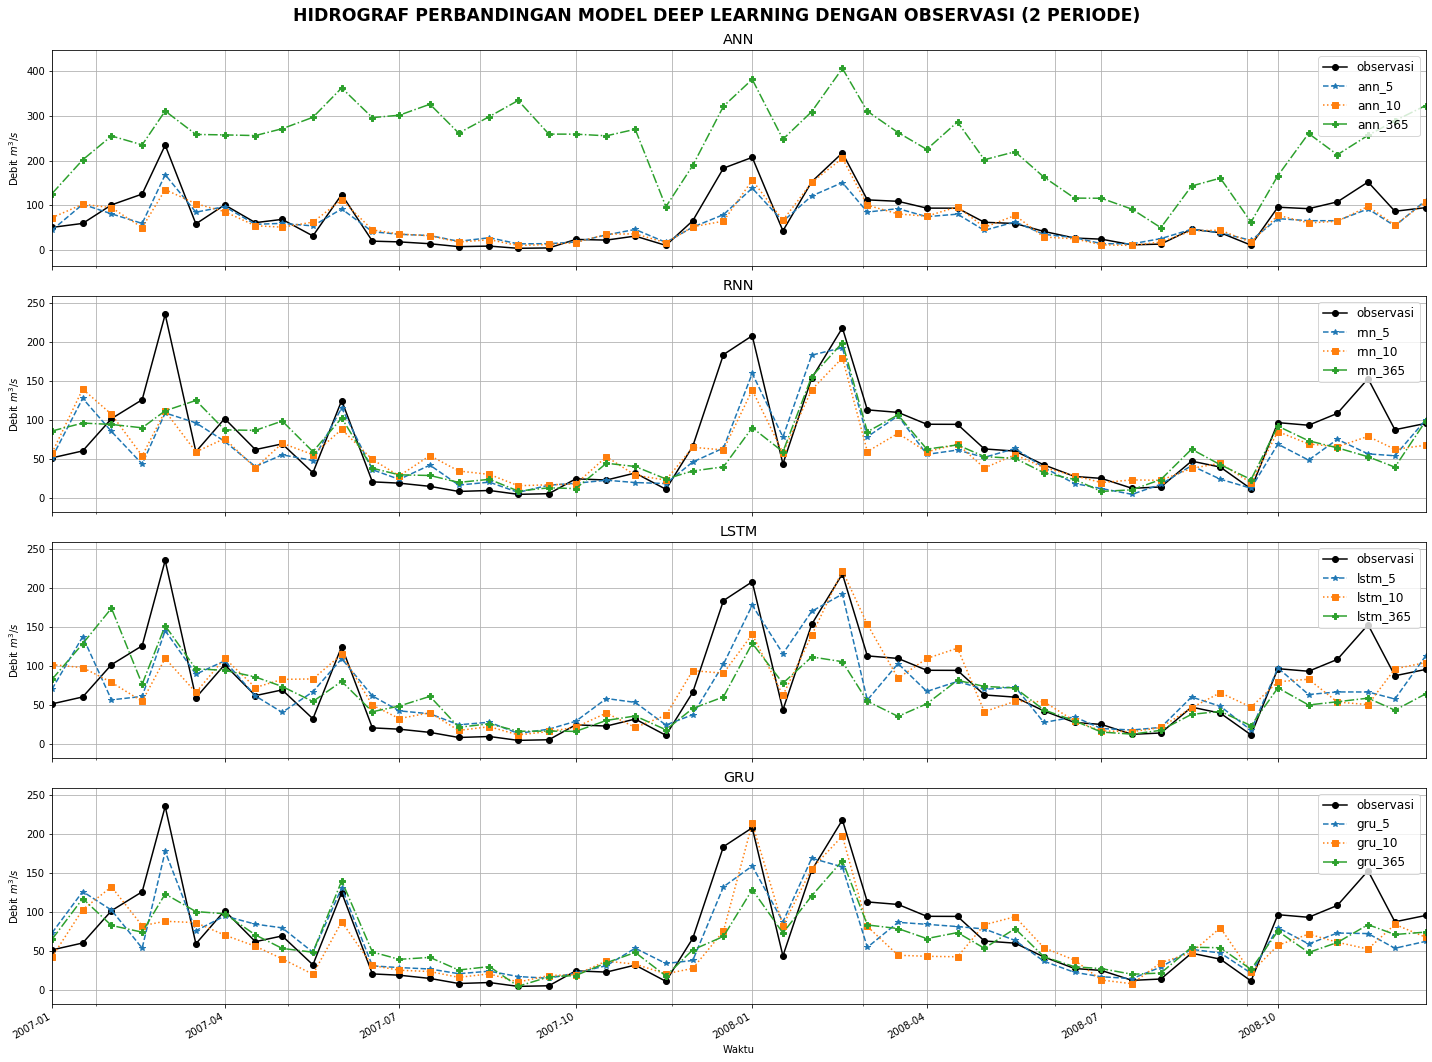

In [ ]:
if _SHOW_IMAGES:
    plot_compare_deep_obs(df_all_2p, _SLICE_TEST, title_date='2 Periode');

## Perbandingan nilai metrik antar model

Grafik berikut membandingkan nilai metrik antar model, baik konseptual ataupun _deep learning_. Perbandingan ini hanya menggunakan _test set_.

### Kode

In [ ]:
def plot_compare_metric(
    df, func, slice_model, title='$NSE$', add_title='TEST SET',
    columns=None, ignore_col=None, eval_col='observasi',
    savefig=_SAVE_IMAGE
    ):

    fig, ax = plt.subplots(figsize=(20,5))

    columns = df.columns.to_list() if columns is None else columns
    columns.remove(eval_col)
    if ignore_col is not None:
        for ign_col in ignore_col:
            columns.remove(ign_col)

    for col in columns:
        obs = df.loc[_SLICE_TEST, eval_col].values
        sim = df.loc[_SLICE_TEST, col].values
        val = func(sim, obs)
        
        ax.bar(col.upper(), val, alpha=0.5)
        #ref: https://stackoverflow.com/a/47812553/4886384
        pos = (col.upper(), val) if val >=0 else (col.upper(), 0)
        ax.annotate(f'{val:.3f}', pos, xytext=(0,5), 
                    textcoords='offset points',
                    ha='center', va='bottom', size='large',
                    fontweight='bold')
    ax.set_title(
        f'PERBANDINGAN NILAI {title} ({add_title})',
        size='xx-large', fontweight='bold')
    ax.set_ylabel(f'Nilai {title}')
    ax.set_xlabel('MODEL')
    ylim = ax.get_ylim()
    ax.set_ylim(bottom=0, top=ylim[1]*1.2)

    ax.grid(False, axis='x')
    ax.grid(True, axis='y')


    fig.tight_layout()
    # fig.subplots_adjust(top=0.98)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_bar_banding_nilai_{}_{}.png'.format(
                clean_title(title), clean_title(add_title)
            ), 
            dpi=150)        

    return fig, ax

### Bulanan

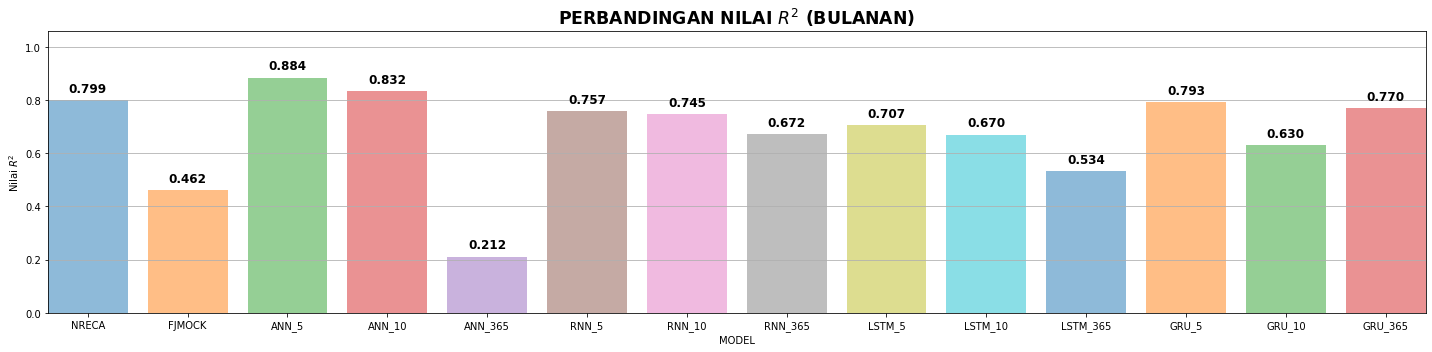

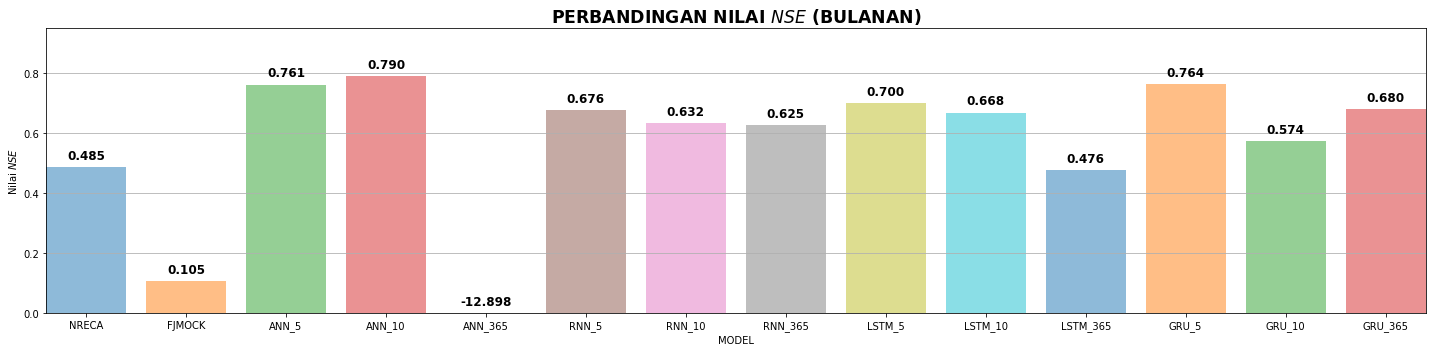

In [ ]:
if _SHOW_IMAGES:
    plot_compare_metric(df_all_bulanan, he.r_squared, _SLICE_TEST,
                        title='$R^2$', add_title='BULANAN');
    plot_compare_metric(df_all_bulanan, he.nse, _SLICE_TEST,
                        title='$NSE$', 
                        add_title='BULANAN');

### 2 Periode

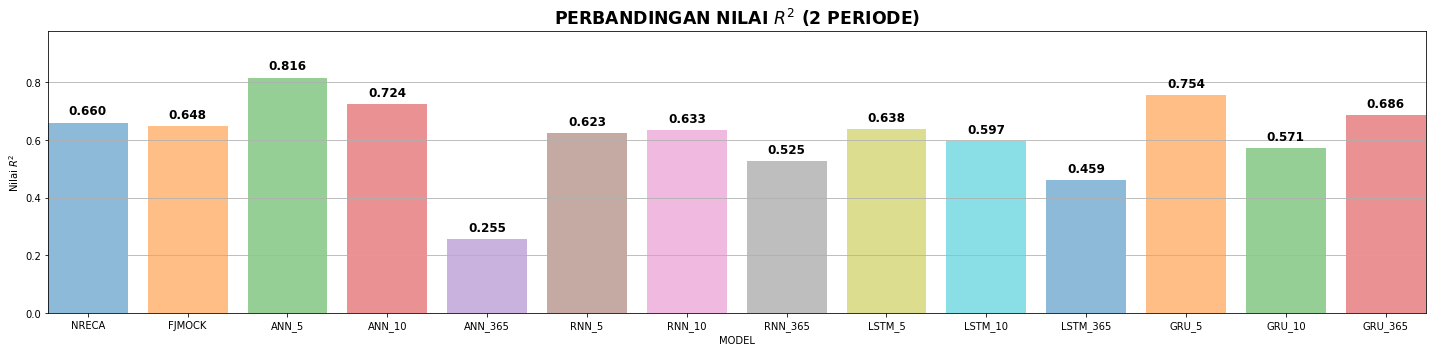

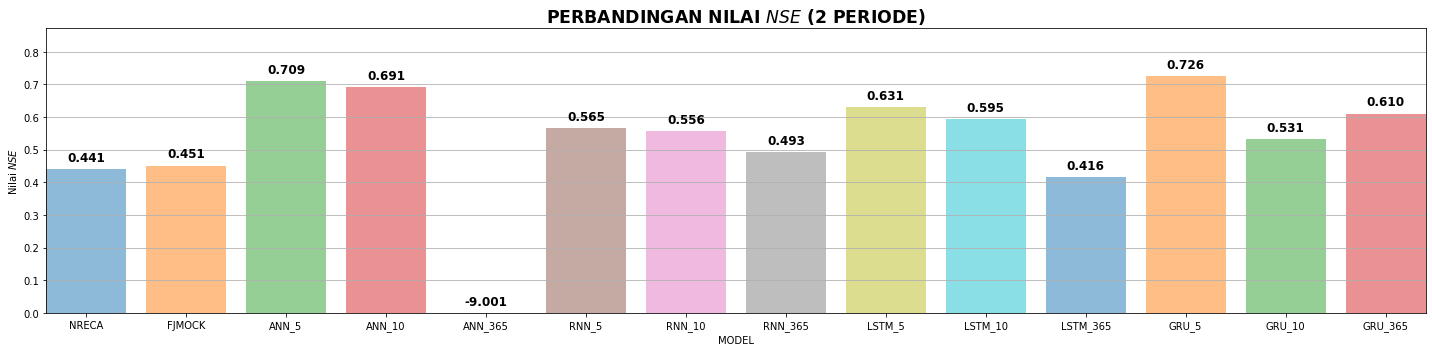

In [ ]:
if _SHOW_IMAGES:
    plot_compare_metric(df_all_2p, he.r_squared, _SLICE_TEST,
                        title='$R^2$', add_title='2 PERIODE');
    plot_compare_metric(df_all_2p, he.nse, _SLICE_TEST,
                        title='$NSE$',
                        add_title='2 PERIODE');

## Perbandingan kurva debit

Grafik ini membandingkan kurva debit (_flow duration curve_) antar model dengan beberapa tinjauan pada nilai probabilitas tertentu. 

### Kode

In [ ]:
def plot_kurva_durasi(
    df, slice_model=slice(None, None),
    title='Konseptual', add_title='Bulanan',
    columns=['nreca', 'fjmock'],
    obs_col='observasi',
    prob=[10, 50, 95],
    savefig=_SAVE_IMAGE):

    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(20,5), sharey=True,
        gridspec_kw={'width_ratios':[3, 1]})

    prob = sorted(prob)

    linestyle = ['--', ':', '-.']

    # PLOT KURVA DURASI

    hk87.debit_andal(df[slice_model], column=obs_col).plot(
        x='prob', y='data', ax=ax[1], label=obs_col)

    for i, col in enumerate(columns):
        hk87.debit_andal(df[slice_model], column=col).plot(
            x='prob', y='data', ax=ax[1], label=col, style=linestyle[i%3])


    # LABELING PLOT KURVA DURASI
    ax[1].set_title(
        f'KURVA DURASI', fontsize='large')
    ax[1].set_xlabel('Probabilitas ($\%$)')
    ax[1].legend(loc='upper right', fontsize='large')

    # FINISHING KURVA
    _lim = ax[1].get_xlim()
    ax[1].set_xticks(prob)
    ax[1].set_xlim(_lim)
    ax[1].grid(False, axis='x')

    # H/VLINE UNTUK PROB

    d_obs = hk87.debit_andal(
        df[slice_model], column=obs_col, 
        kind='prob', prob=prob)

    for _prob, _val in d_obs.items():
        ax[1].hlines(y=_val, xmin=0, xmax=_prob, color='y', ls='--', lw=1.2)
        ax[1].vlines(x=_prob, ymin=0, ymax=_val, color='y', ls='--', lw=1.2)
        ax[0].axhline(y=_val, c='y', ls='--', lw=1.2)


    # PLOT BAR

    # POSISI BAR PLOT
    width = 1
    n = len(prob)
    n_model = len(columns)
    s_pos = np.array([p*((n_model + 1)*width + width) for p in range(n)])

    # BAR OBSERVASI
    ax[0].bar(s_pos, d_obs.values(), width, label=obs_col, align='edge', alpha=0.5)

    # ANNOTATE OBSERVASI
    for i, val in enumerate(d_obs.values()):
        ax[0].annotate(
            f'{val:.2f}', 
            (s_pos[i] + (width/2), val), xytext=(0,5), 
            textcoords='offset points',
            ha='center', va='bottom', fontsize='large', fontweight='bold',
        )

    # BAR SIMULASI
    group_s_pos = []
    for k in range(1, len(columns)+1):
        _k_pos = s_pos + k*width
        group_s_pos.append(_k_pos)

    for i, model in enumerate(columns):
        d_model = hk87.debit_andal(
            df[slice_model], column=model,
            kind='prob', prob=prob
        )
        ax[0].bar(
            group_s_pos[i], d_model.values(), width, label=model, 
            alpha=0.6, align='edge')

        for j, val in enumerate(d_model.values()):
            _lpos = group_s_pos[i][j] + width/2

            if val >= max(d_obs.values()):
                _ypos = list(d_obs.values())[j]
            else:
                _ypos = val
            
            _dobs = list(d_obs.values())[j]
            _percent = (val-_dobs) / _dobs * 100

            ax[0].annotate(
                f'{_percent:.0f}%\n({val:.2f})',
                (_lpos, _ypos), xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
            )

    # LABEL
    l_pos = s_pos + ((n_model+1)*width/2)
    ax[0].set_xticks(l_pos)
    ax[0].set_xticklabels([f'{p}%' for p in prob])    

    # FINISHING BAR
    ax[0].set_ylabel('Debit ($m^3/s$)')
    ax[0].margins(y=0.1)
    ax[0].set_ylim([0, max(d_obs.values())*1.2])
    ax[0].set_xlabel('Probabilitas (%)')
    ax[0].set_title('PERBANDINGAN NILAI')
    ax[0].legend(loc='upper right', fontsize='large')
    ax[0].grid(False, axis='x')

    fig.tight_layout()
    fig.suptitle(
        f'Kurva Durasi Model {title} ({add_title})', 
        fontweight='bold', fontsize='xx-large')
    fig.subplots_adjust(top=0.88)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_kurva_durasi_{}_{}.png'.format(
                clean_title(title), clean_title(add_title).replace(' ','_'), 
            ), 
            dpi=150)    


### Bulanan

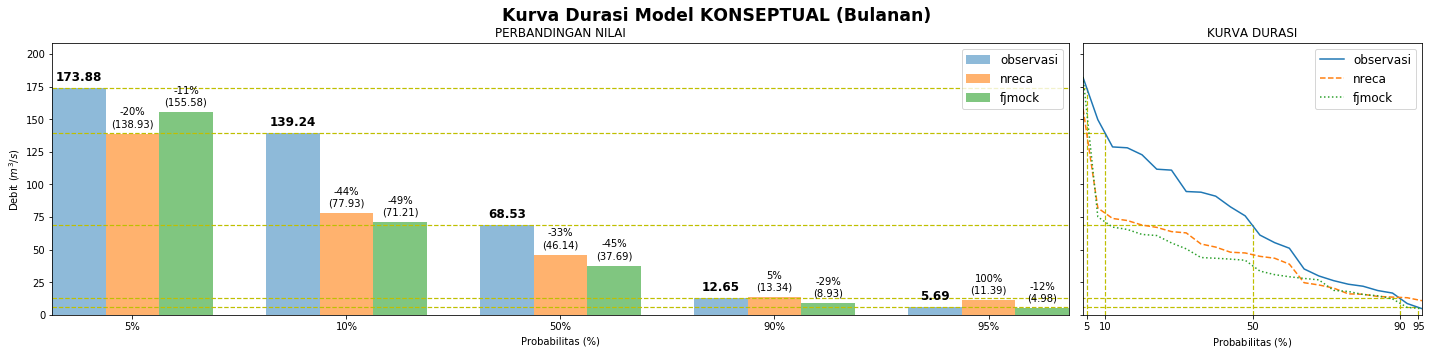

In [ ]:
_prob = [5, 10, 50, 90, 95]

if _SHOW_IMAGES:
    _col = 'nreca fjmock'.split()
    plot_kurva_durasi(
        df_all_bulanan, _SLICE_TEST, columns=_col, 
        title='KONSEPTUAL', add_title='Bulanan',
        prob=_prob)

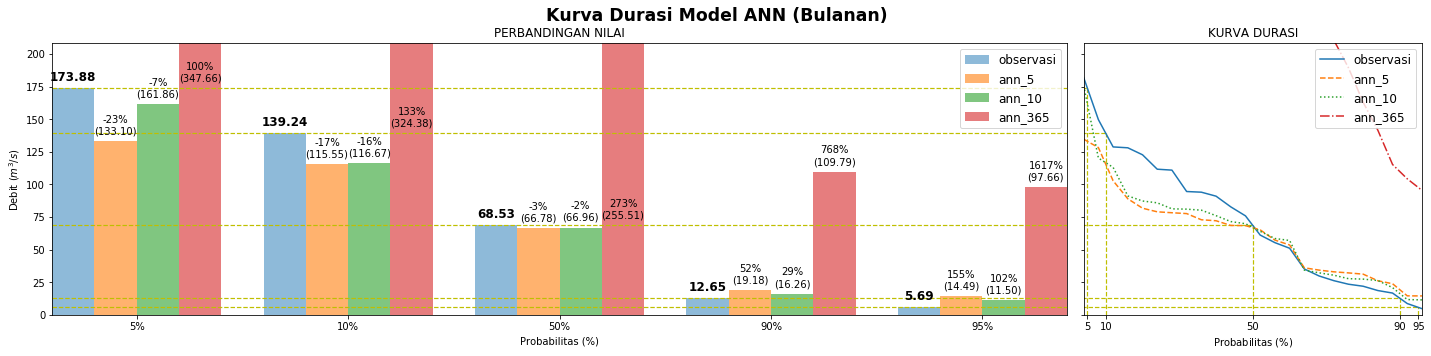

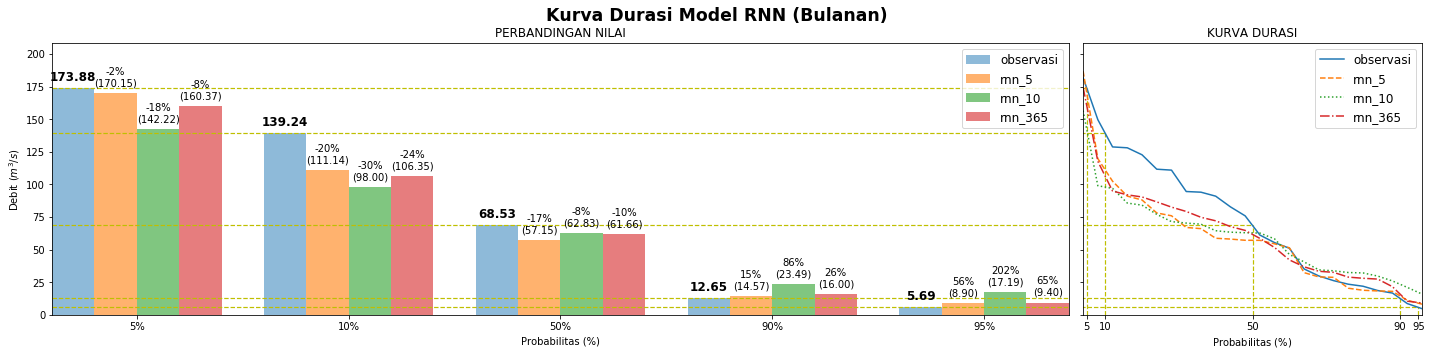

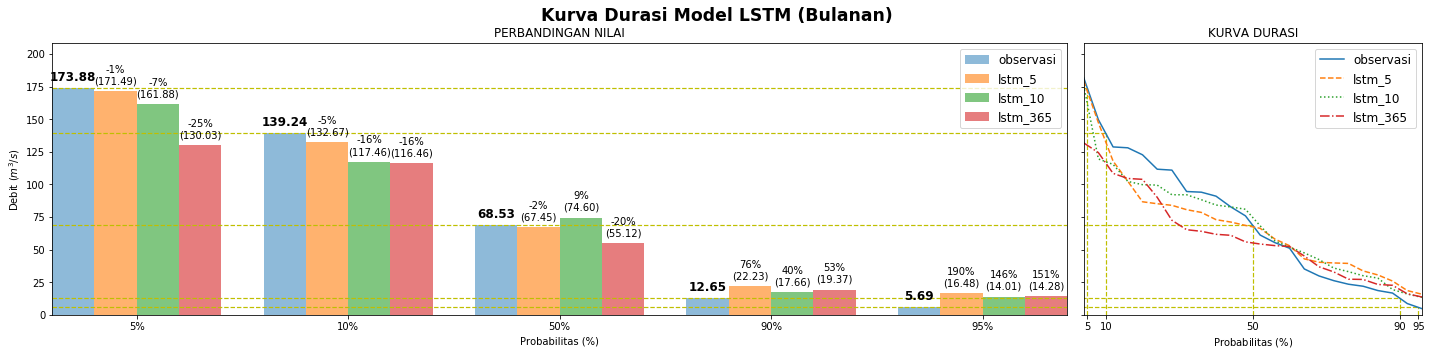

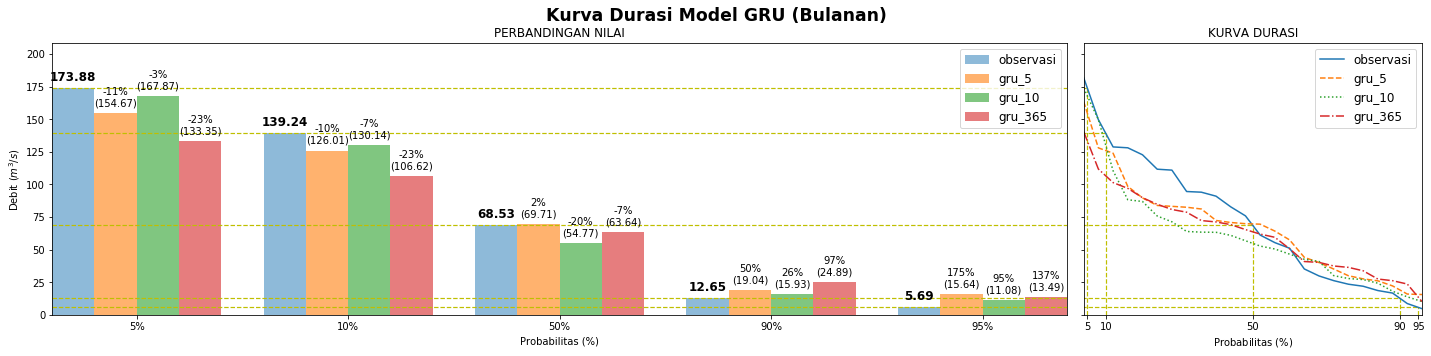

In [ ]:
_model_deep_name = 'ann rnn lstm gru'.split()

if _SHOW_IMAGES:
    for _m in _model_deep_name:
        _col = '{a}_5 {a}_10 {a}_365'.format(a=_m).split()
        plot_kurva_durasi(
            df_all_bulanan, _SLICE_TEST, columns=_col, 
            title=_m.upper(), add_title='Bulanan',
            prob=_prob)

### 2 Periode

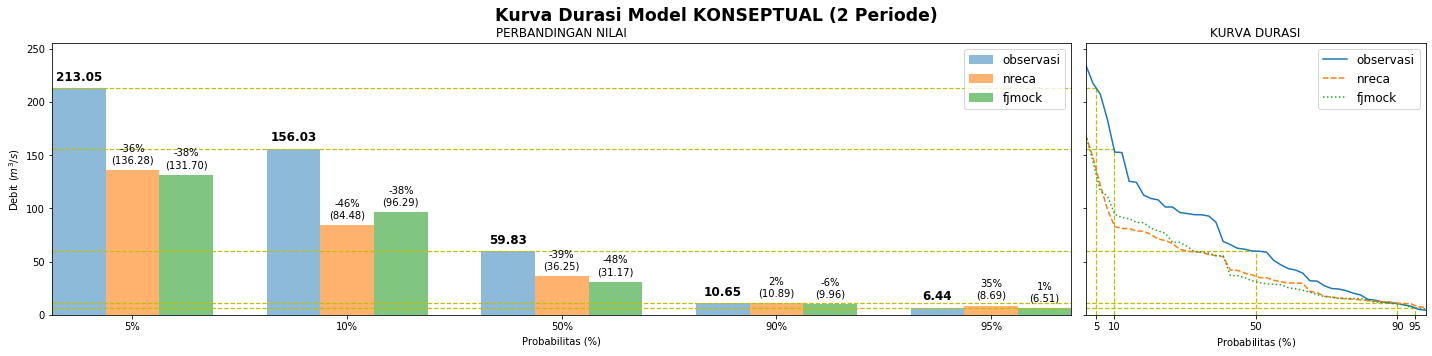

In [ ]:
if _SHOW_IMAGES:
    _col = 'nreca fjmock'.split()
    plot_kurva_durasi(
        df_all_2p, _SLICE_TEST, columns=_col, 
        title='KONSEPTUAL', add_title='2 Periode',
        prob=_prob)

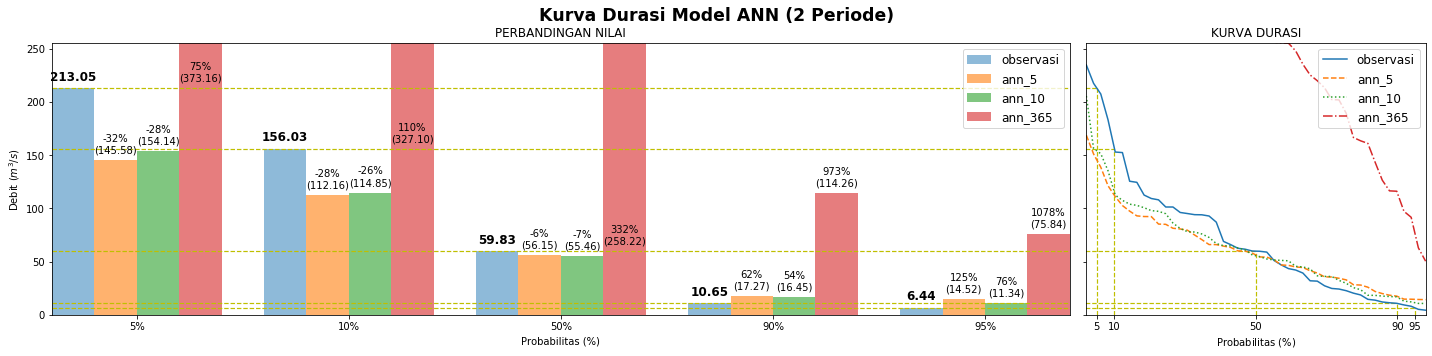

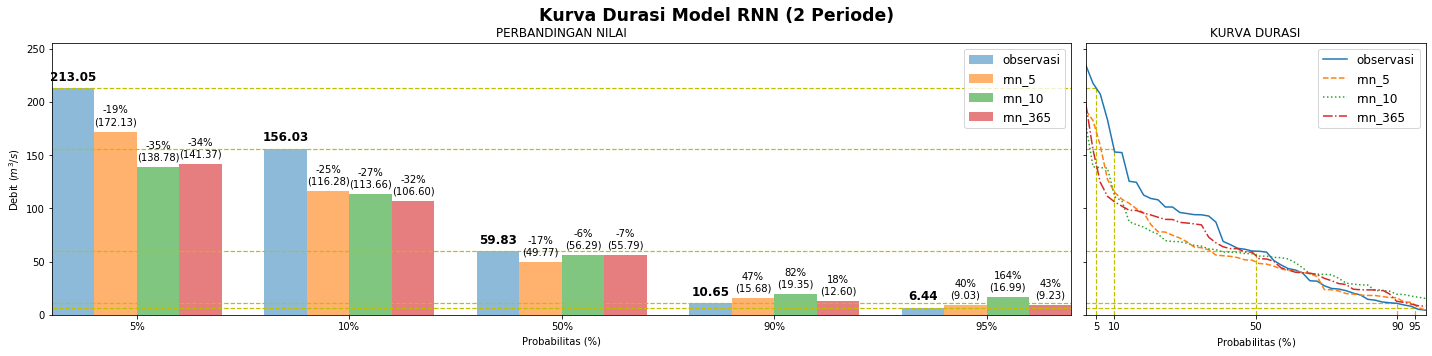

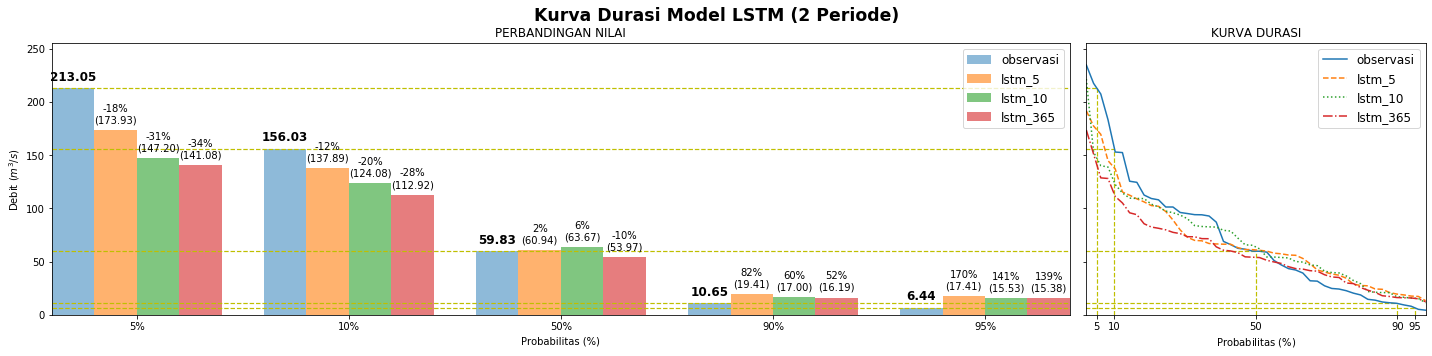

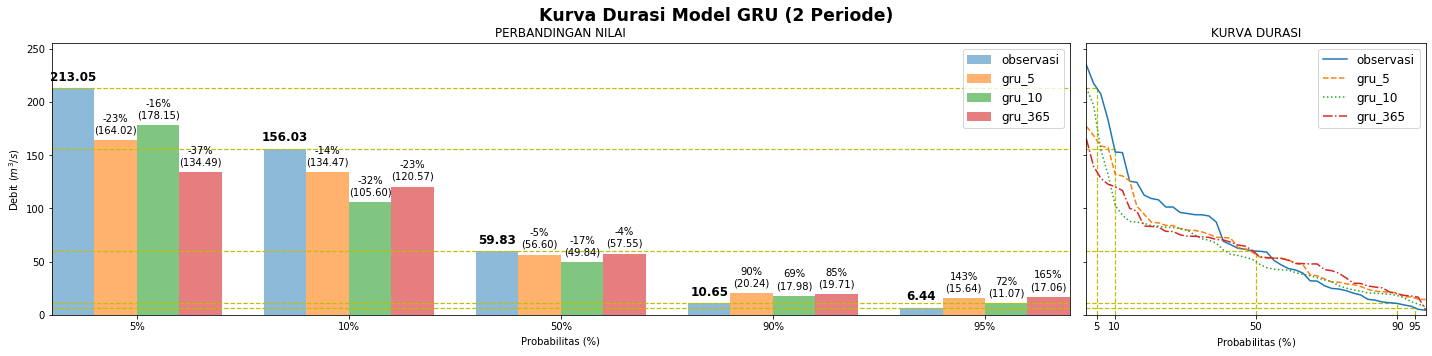

In [ ]:
if _SHOW_IMAGES:
    for _m in _model_deep_name:
        _col = '{a}_5 {a}_10 {a}_365'.format(a=_m).split()
        plot_kurva_durasi(
            df_all_2p, _SLICE_TEST, columns=_col, 
            title=_m.upper(), add_title='2 Periode',
            prob=_prob)

## Perbandingan nilai debit andal

Serupa dengan grafik sebelumnya, grafik ini membandingkan nilai debit pada probabilitas tertentu terhadap seluruh model. 

### Kode

In [ ]:
def plot_banding_debit_andal(
    df, slice_model, prob, add_title='BULANAN',
    savefig=_SAVE_IMAGE
    ):

    fig, ax = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5),
                        gridspec_kw={'width_ratios':[0.4, 0.6, 1, 1, 1, 1]})

    _prob = prob
    _ytop = []

    # OBSERVASI

    _valobs = hk87.debit_andal(
        df[_SLICE_TEST], column='observasi', 
        kind='prob', prob=[_prob])[_prob]
    ax[0].bar('observasi', _valobs, color='k', alpha=0.8)
    ax[0].set_title('OBSERVASI')
    ax[0].annotate(f'{_valobs:.3f}', ('observasi', _valobs), xytext=(0,5), 
                textcoords='offset points',
                ha='center', va='bottom', size='large')
    _ytop.append(_valobs)
    ax[0].grid(False, axis='x')

    for _ax in ax:
        _ax.axhline(y=_valobs, ls='--', alpha=0.7)

    # KONSEPTUAL
    _concepts = ['nreca', 'fjmock']

    for con in _concepts:
        _val = hk87.debit_andal(
            df[_SLICE_TEST], column=con, kind='prob', prob=[_prob]
        )[_prob]
        ax[1].bar(con, _val, color='b', alpha=0.8)
        ax[1].annotate(f'{_val:.3f}', (con, _val), xytext=(0,5), 
                textcoords='offset points',
                ha='center', va='bottom', size='large')
        ax[1].annotate(
            f'({(_val-_valobs)/_valobs*100:.2f}%)', 
            (con, _val), xytext=(0,20), 
            textcoords='offset points',
            ha='center', va='bottom', size='large')
        _ytop.append(_val)
    ax[1].set_title('KONSEPTUAL')
    ax[1].grid(False, axis='x')

    # DEEP LEARNING
    _deep = ['ann', 'rnn', 'lstm', 'gru']
    _ts = ['{}_5', '{}_10', '{}_365']

    for i, mod in enumerate(_deep, start=2):
        for t in _ts:
            _col = t.format(mod)
            _val = hk87.debit_andal(
                df[_SLICE_TEST], column=_col, 
                kind='prob', prob=[_prob])[_prob]
            ax[i].bar(_col, _val, color='y', alpha=0.5)
            if _col == 'ann_365':
                ax[i].annotate(f'{_val:.3f}', (_col, _valobs), xytext=(0,5), 
                textcoords='offset points',
                ha='center', va='bottom', size='large')
                ax[i].annotate(
                    f'({(_val-_valobs)/_valobs*100:.2f}%)', 
                    (_col, _valobs), xytext=(0,20), 
                    textcoords='offset points',
                    ha='center', va='bottom', size='large')
            else:
                ax[i].annotate(f'({_val:.3f})', (_col, _val), xytext=(0,5), 
                textcoords='offset points',
                ha='center', va='bottom', size='large')
                ax[i].annotate(
                    f'{(_val-_valobs)/_valobs*100:.2f}%', 
                    (_col, _val), xytext=(0,20), 
                    textcoords='offset points',
                    ha='center', va='bottom', size='large')
            _ytop.append(_val)
        ax[i].set_title(mod.upper())
        ax[i].grid(False, axis='x')
            
    # FINISHING
    _ytop.pop(5)
    _maxylim = max(_ytop)
    _minylim = min(_ytop)
    for i in range(6):
        ax[i].margins(x=0.1)

    # TITLE
    fig.suptitle(f'Perbandingan Nilai Debit Andal {_prob}% ({add_title})', 
                fontweight='bold', size='xx-large')
    fig.tight_layout()
    fig.subplots_adjust(top=0.88, left=0.04)
    ax[0].set_ylabel('Debit $m^3/s$')
    ax[0].set_ylim(bottom=_minylim*0.8, top=_maxylim*1.15)

    if savefig:
        plt.savefig(
            _DIRIMAGE / 'grafik_bar_banding_debitandal_{}_{}.png'.format(
                clean_title(add_title), _prob, 
            ), 
            dpi=150)    

    return fig, ax

### Bulanan

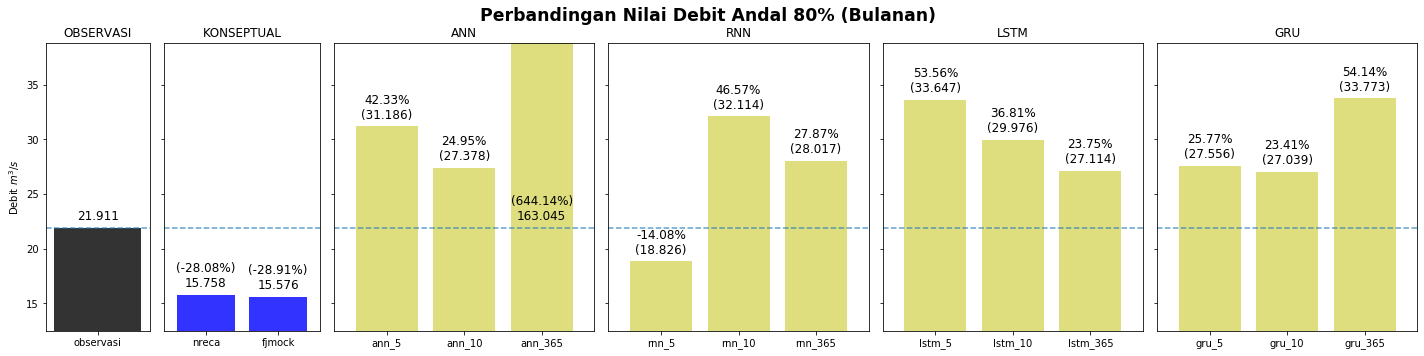

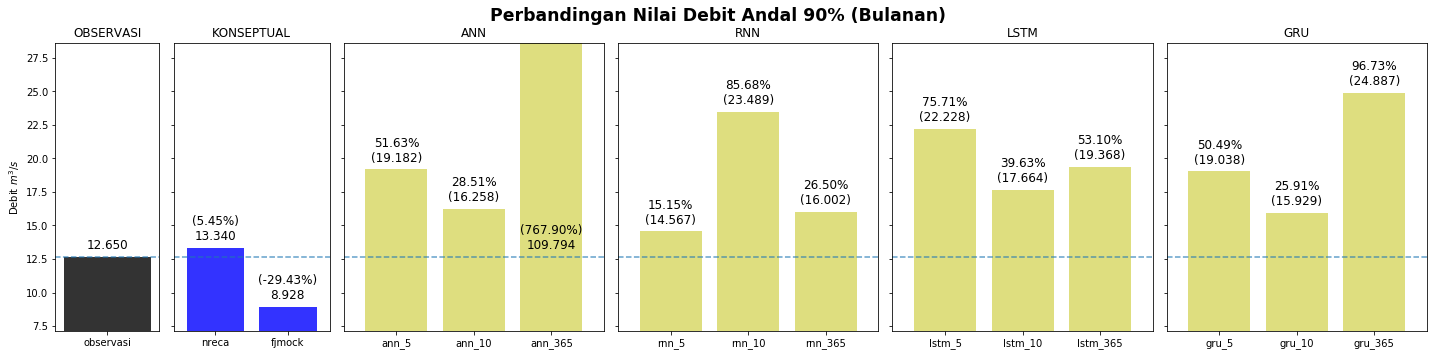

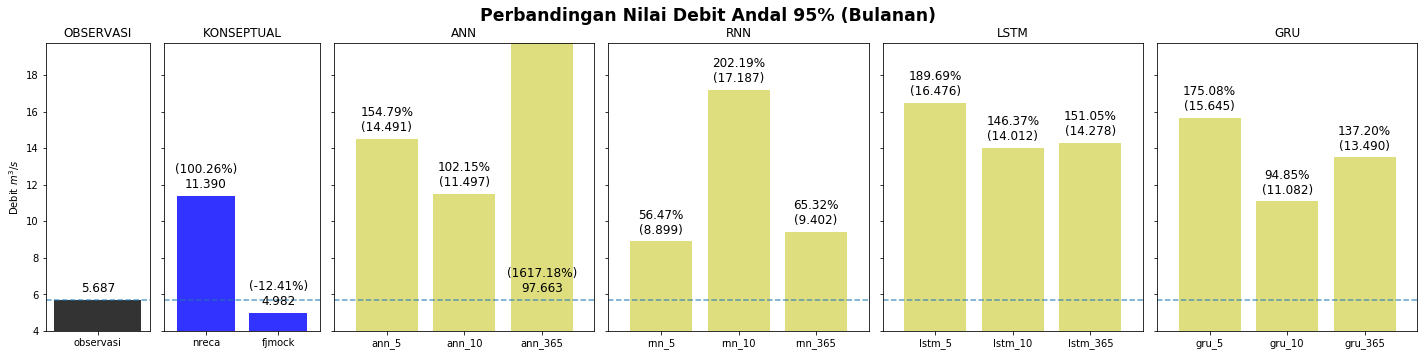

In [ ]:
_prob = [80, 90, 95]

if _SHOW_IMAGES:
    for prob in _prob:
        plot_banding_debit_andal(
            df_all_bulanan, _SLICE_TEST, prob, add_title='Bulanan');

### 2 Periode

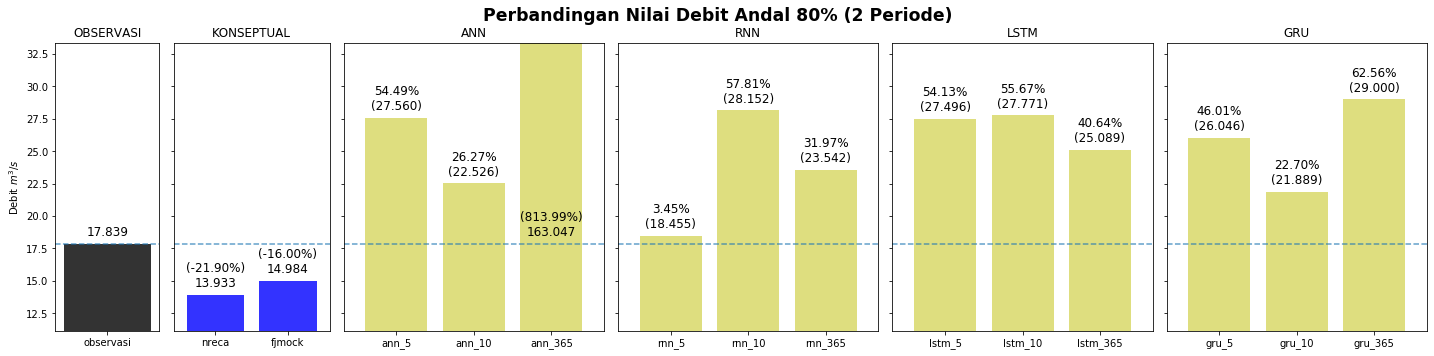

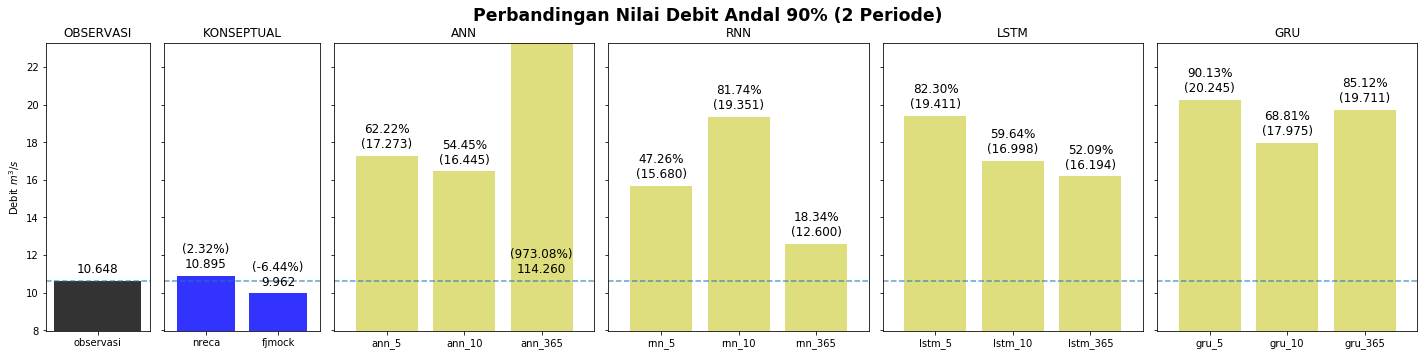

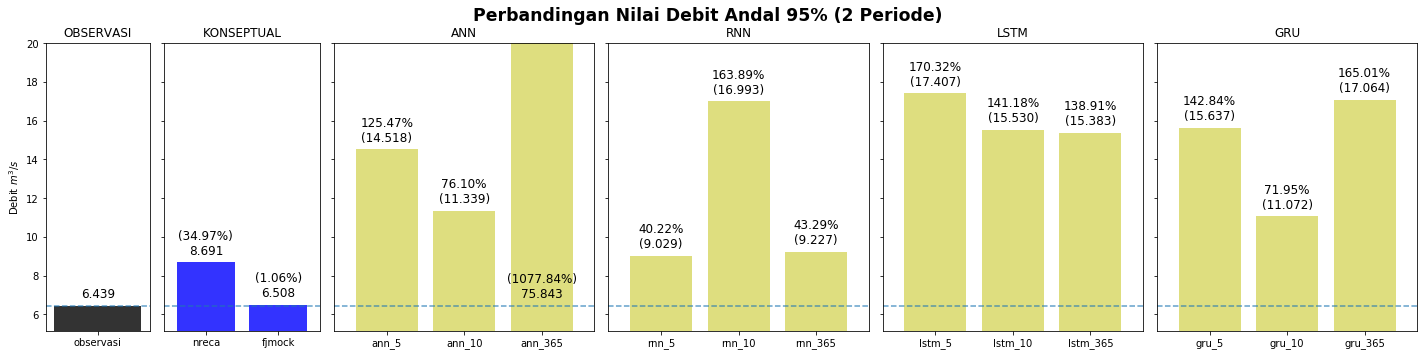

In [ ]:
if _SHOW_IMAGES:
    for prob in _prob:
        plot_banding_debit_andal(
            df_all_2p, _SLICE_TEST, prob, add_title='2 Periode');

# Changelog

```
- 20200211 - 1.0.0 - Initial
```

Copyright &copy; 2020 [Taruma Sakti Megariansyah](https://taruma.github.io) (hi@taruma.info)

Source code in this notebook is licensed under a [MIT License](https://choosealicense.com/licenses/mit/). Data in this notebook is licensed under a [Creative Common Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/). 
